# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## 1- Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## 2- Data Overview

- Observations
- Sanity checks

In [2]:
# loading the dataset
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking the shape of the data

data.shape

print(f"The data contains {data.shape[0]} rows")  # f-string
print(f"The data contains {data.shape[1]} columns")  # f-string

The data contains 36275 rows
The data contains 19 columns


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(15, random_state=23)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
17949   INN17950             1               0                     2   
11766   INN11767             2               0                     1   
32026   INN32027             2               0                     1   
26671   INN26672             2               0                     0   
21857   INN21858             2               0                     2   
30740   INN30741             2               0                     2   
23706   INN23707             2               0                     2   
13197   INN13198             2               0                     0   
14078   INN14079             3               0                     0   
7827    INN07828             2               0                     2   
34632   INN34633             2               0                     1   
11748   INN11749             3               0                     1   
34636   INN34637             1               0                     0   
14320   INN14321             2               1                     0   
3183    INN03184             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
17949                  1       Meal Plan 2                           0   
11766                  1       Meal Plan 1                           0   
32026                  0       Meal Plan 1                           0   
26671                  4       Meal Plan 1                           0   
21857                  2       Meal Plan 1                           0   
30740                  3       Meal Plan 1                           0   
23706                  3      Not Selected                           0   
13197                  2       Meal Plan 1                           0   
14078                  3       Meal Plan 1                           0   
7827                   1       Meal Plan 1                           0   
34632                  3      Not Selected                           0   
11748                  4       Meal Plan 2                           0   
34636                  2       Meal Plan 1                           0   
14320                  3       Meal Plan 1                           0   
3183                   2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
17949        Room_Type 1        122          2018              3   
11766        Room_Type 1         60          2017             10   
32026        Room_Type 1         11          2017              8   
26671        Room_Type 1        270          2018              4   
21857        Room_Type 1        219          2018             10   
30740        Room_Type 4         26          2017             10   
23706        Room_Type 1         61          2018              7   
13197        Room_Type 1        245          2018              6   
14078        Room_Type 4        120          2018              6   
7827         Room_Type 1         88          2018             12   
34632        Room_Type 1         26          2018             10   
11748        Room_Type 1        197          2018             12   
34636        Room_Type 1          4          2018              6   
14320        Room_Type 1         51          2018             12   
3183         Room_Type 1         34          2017             10   

       arrival_date market_segment_type  repeated_guest  \
17949            27             Offline               0   
11766            12             Offline               0   
32026            24              Online               0   
26671            20             Offline               0   
21857            22              Online               0   
30740             4              Online               0   
23706            23              Online               0   
13197            17             Offline               0   
14078             2              Online         

<IPython.core.display.Javascript object>

## Observation
* lead_time column has a wide range of value.
* In column of type_of_meal_plan the NAN value is filled with Not Selected.
* There are lots of 0 in some columns.

In [5]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data.

In [7]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

## Observation
* There is no null value in the data.
* Data type are mosly integer (13); Only one float data type and 5 object type.

In [8]:
# checking for missing values in the data.
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

## Observation
* As mentioned above, there is no null value in the data.

In [9]:
# Statistical summary of the data
df.describe(include="all").T

count unique           top   freq  \
Booking_ID                              36275  36275      INN04089      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  

<IPython.core.display.Javascript object>

## Observation
* Mostly the number of adults are 2.
* The number of childeren is near 0 in average.

In [10]:
df["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

## Observation
* Near 30 percent of the booked items are canceled. 

In [11]:
for feature in df.columns:  # Loop through all columns in the dataframe
    if df[feature].dtype == "object":  # Only apply for columns with object strings
        df[feature] = pd.Categorical(df[feature])  # Replace object with categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

## Observation
* Change the "object" dtype to "category" one. 

In [12]:
for feature in df.columns:  # Loop through all columns in the dataframe
    if df[feature].dtype != "int64":  # Only apply for columns with categorical strings
        print(df[feature].value_counts())

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
139.88      1
82.59       1
126.69      1
108.35      1
178.33      1
Name: avg_price_per_room, Length: 3930, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


<IPython.core.display.Javascript object>

## 3- Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### 3-1 Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

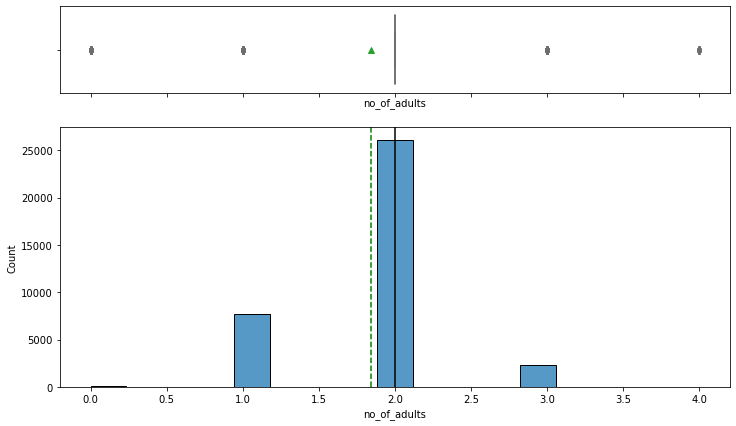

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "no_of_adults")

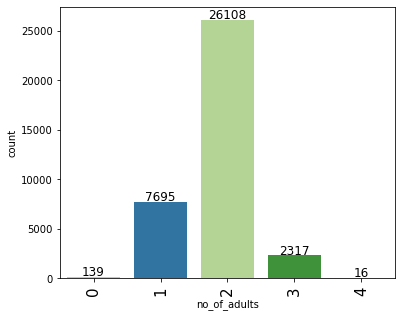

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(df, "no_of_adults")

## Observation
* Number of adults are mostly 2 persons, then 1 and then 3.
* Number of zero adults should be investigated

In [17]:
df.loc[df["no_of_adults"] == 0]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
32      INN00033             0               2                     0   
287     INN00288             0               2                     2   
653     INN00654             0               2                     1   
937     INN00938             0               2                     0   
954     INN00955             0               2                     1   
...          ...           ...             ...                   ...   
34720   INN34721             0               2                     0   
34730   INN34731             0               2                     1   
34890   INN34891             0               2                     2   
35691   INN35692             0               2                     2   
35797   INN35798             0               2                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
32                     3       Meal Plan 1                           0   
287                    2       Meal Plan 1                           0   
653                    2       Meal Plan 1                           0   
937                    3       Meal Plan 1                           0   
954                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
34720                  3       Meal Plan 1                           0   
34730                  1       Meal Plan 1                           0   
34890                  2       Meal Plan 1                           0   
35691                  1       Meal Plan 1                           0   
35797                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
32           Room_Type 2         56          2018             12   
287          Room_Type 1         68          2018              4   
653          Room_Type 2         78          2018              8   
937          Room_Type 2         40          2018              1   
954          Room_Type 2         92          2018             10   
...                  ...        ...           ...            ...   
34720        Room_Type 2         76          2018              9   
34730        Room_Type 2        178          2018              8   
34890        Room_Type 2         31          2018              9   
35691        Room_Type 2         75          2018              3   
35797        Room_Type 2        120          2018              6   

       arrival_date market_segment_type  repeated_guest  \
32                7              Online               0   
287              24              Online               0   
653              19              Online               0   
937              14              Online               0   
954              29              Online               0   
...             ...                 ...             ...   
34720            21              Online               0   
34730            27              Online               0   
34890            16              Online               0   
35691            19              Online               0   
35797            30              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
32                                0                                     0   
287                               0                                     0   
653                               0                                     0   
937                               0                                     0   
954                               0                                     0   
...                             ...                                   ...   
34720                             0                                     0   
34730                             0                                     0   
34890                            

<IPython.core.display.Javascript object>

## Observation
* When the number of adults are zero, then the number of children is not (if we consider the childeren is in the age that can make reservation)


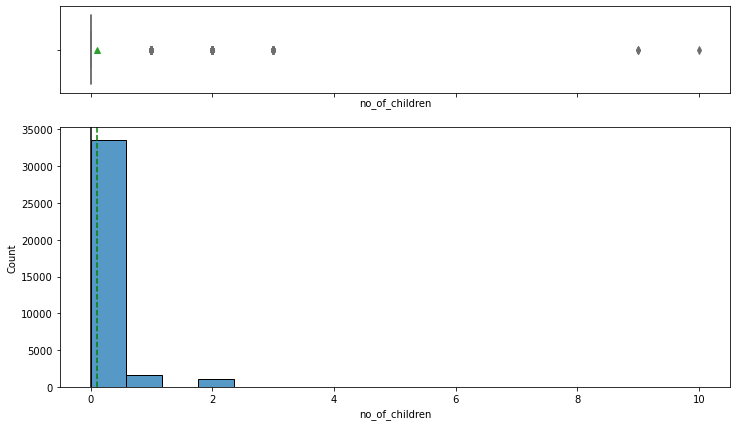

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "no_of_children")

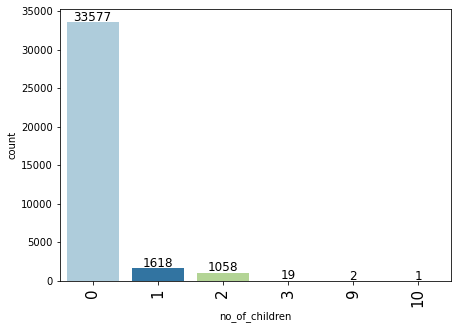

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "no_of_children")

## Observation
* Zero children is the dominant group for reservation.

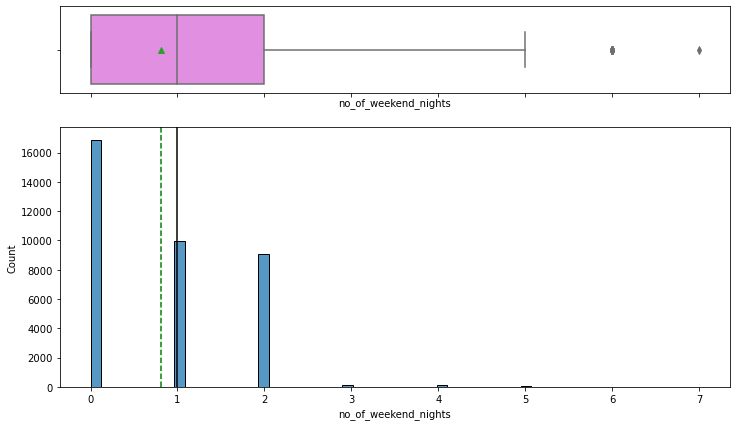

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "no_of_weekend_nights")

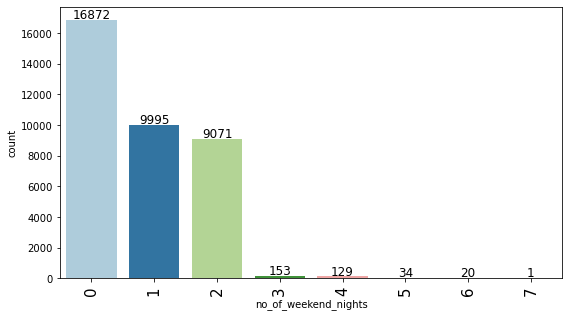

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(df, "no_of_weekend_nights")

## Observation
* At the weekends, the hotels are booked for zero, one and two nights mostly.
* Rarely booked more than 2 nights.
* The maximum night booked is 7.

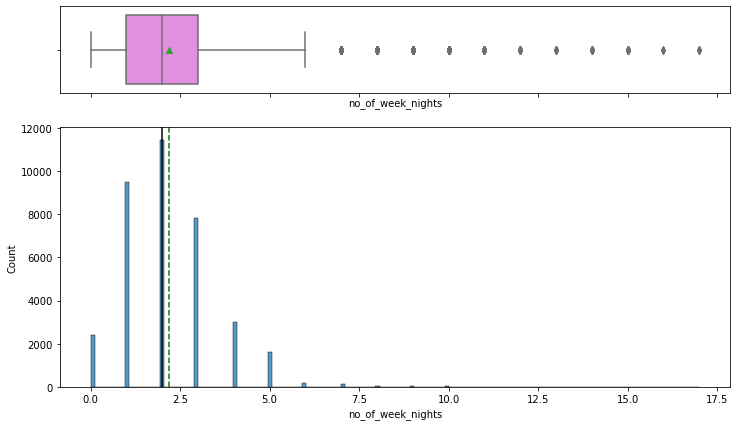

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "no_of_week_nights")

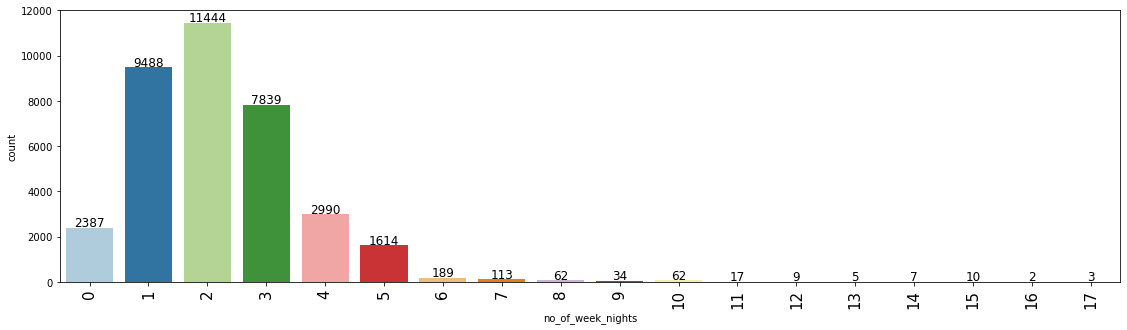

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "no_of_week_nights")

## Observation
* At the week nights, the hotels are booked mostly for 2 nights.
* The maximum value is 17.

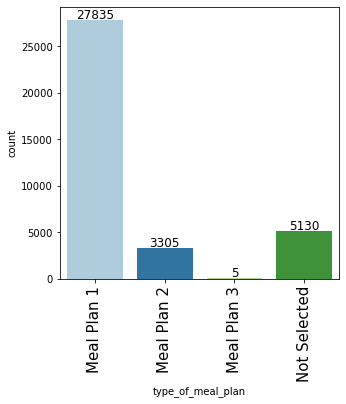

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "type_of_meal_plan")

## Observation
* Most of the gusts chose Meal Plan 1.
* Near zero chose Meal Plan 3.

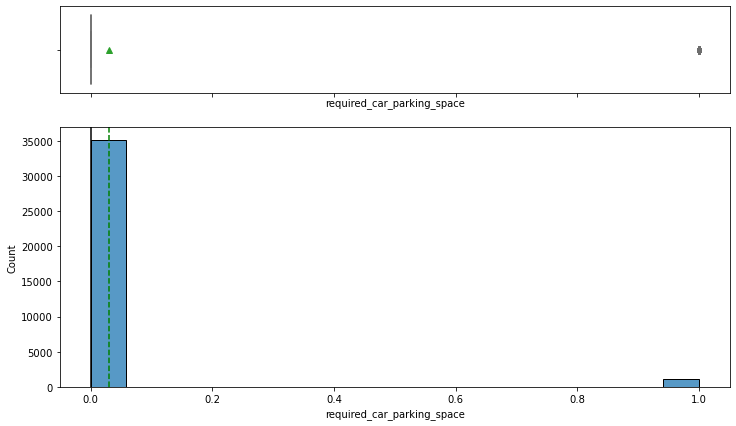

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "required_car_parking_space")

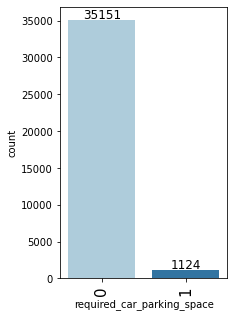

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "required_car_parking_space")

## Observation
* Mostly the hotels are booked without car parking space.

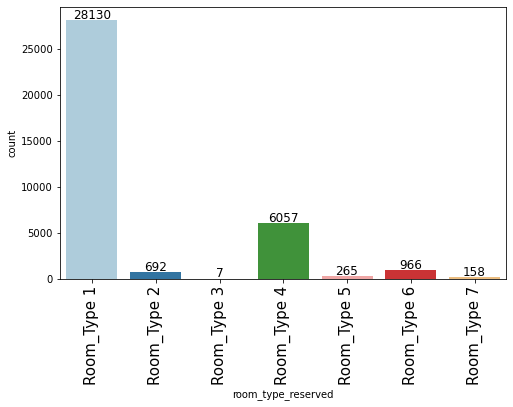

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "room_type_reserved")

## Observation
* Room Type 1 is highly requsted by the guests.

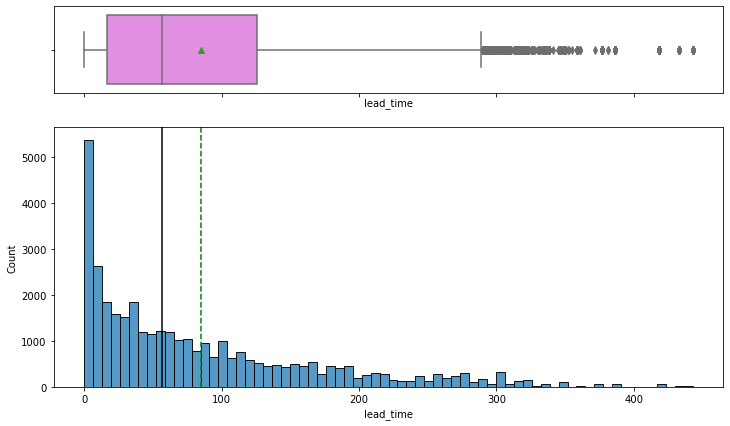

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "lead_time")

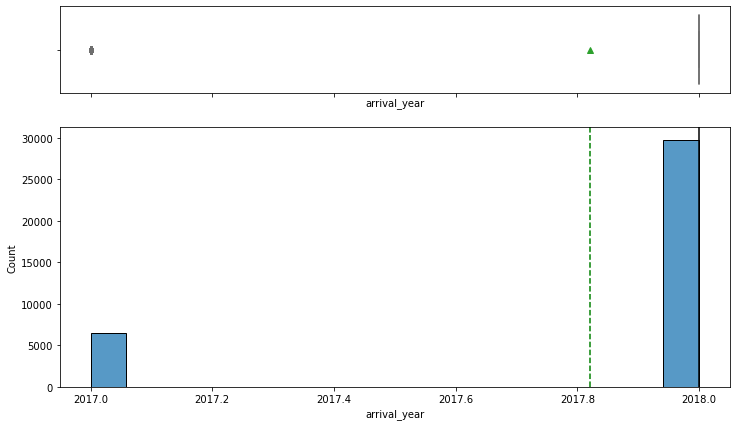

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "arrival_year")

### Observation
* The number of arrival is increased a lot at 2018 year respect to 2017 year.

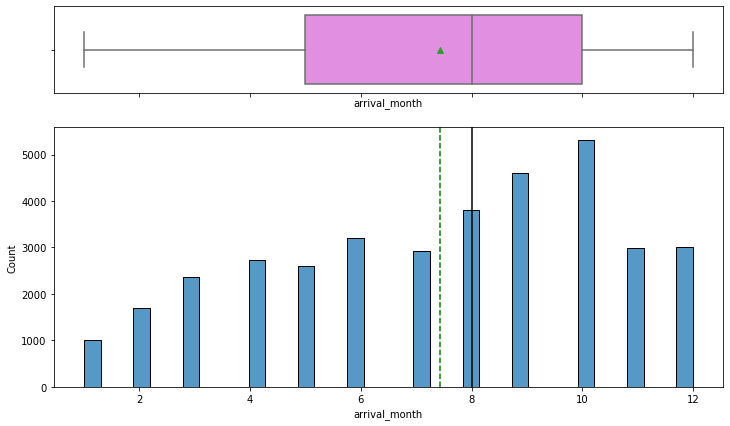

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "arrival_month")

### Observation
* The people arrives at the hotel in the 10th month of year.
* The least amount come back to the first month of the year.


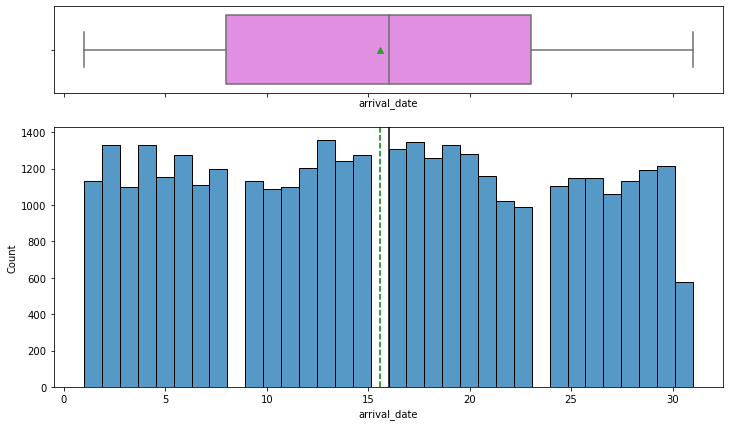

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "arrival_date")

### Observation
* The date of arrival in the month is randomly distributed without any skewness.


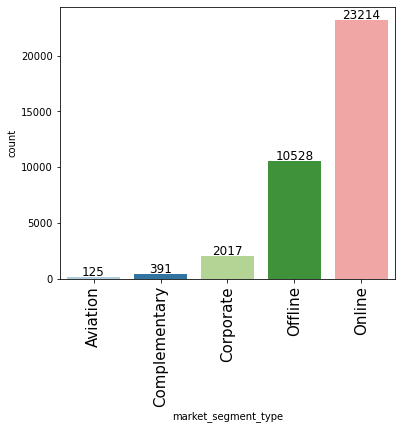

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "market_segment_type")

### Observation
* Guests are mostly reserve the hotels using online market segment.

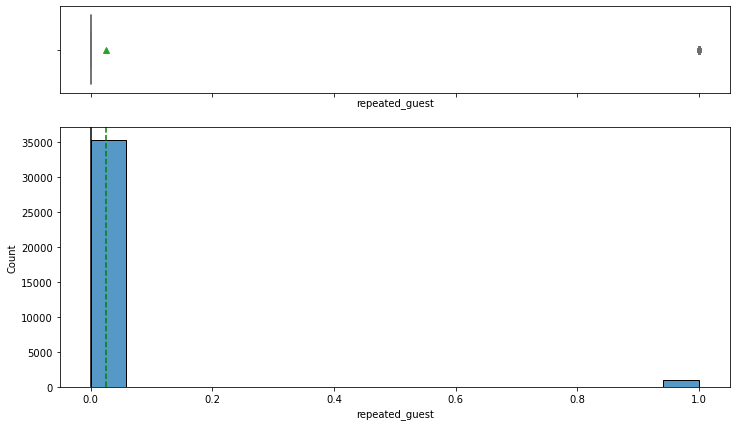

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "repeated_guest")

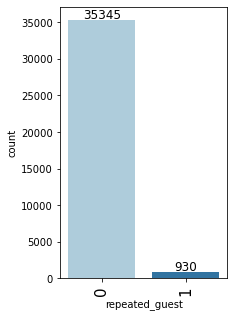

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "repeated_guest")

### Observation
* A few percent of guests are repeated the booking.


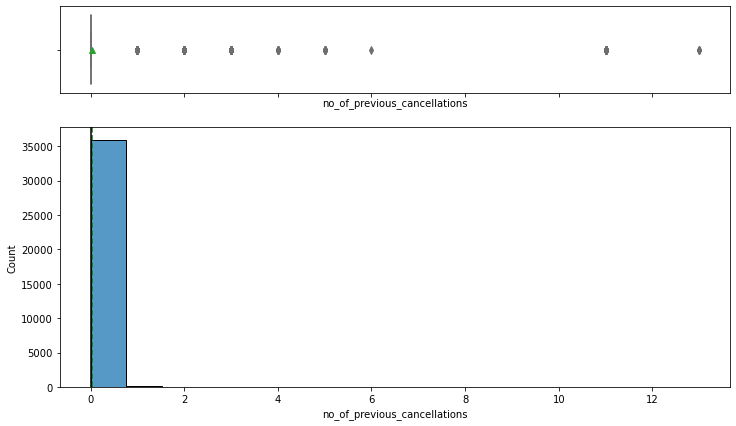

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(df, "no_of_previous_cancellations")

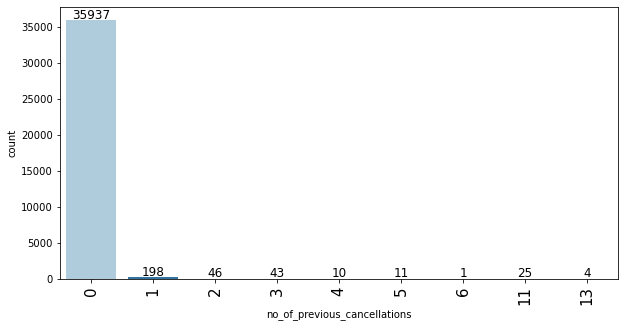

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "no_of_previous_cancellations")

### Observation
* A few percentage of guests cancelled their booking before the current one.

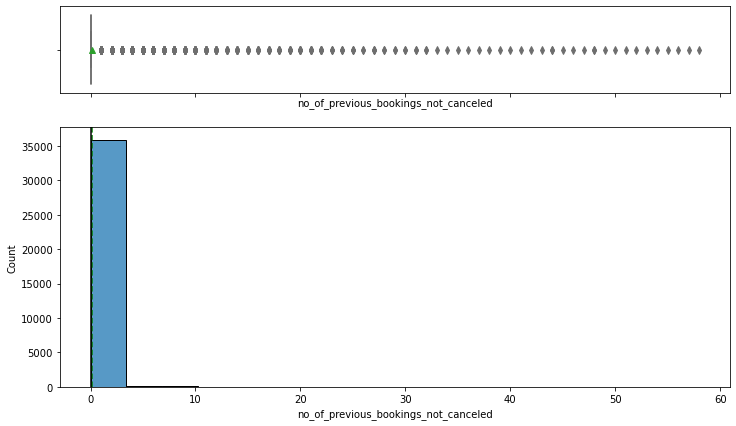

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

In [38]:
df["no_of_previous_bookings_not_canceled"].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
13        7
16        7
20        6
17        6
18        6
19        6
22        6
21        6
27        3
23        3
24        3
25        3
28        2
30        2
29        2
26        2
48        2
31        2
44        2
32        2
47        1
55        1
33        1
34        1
35        1
36        1
58        1
37        1
57        1
38        1
56        1
39        1
40        1
54        1
41        1
53        1
42        1
52        1
43        1
51        1
50        1
45        1
49        1
46        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

<IPython.core.display.Javascript object>

### Observation
* In average the price per room is around 100.
* There are outliers in the lower range of the average price (There are zero on the data).
* The data is slightly right skewed.

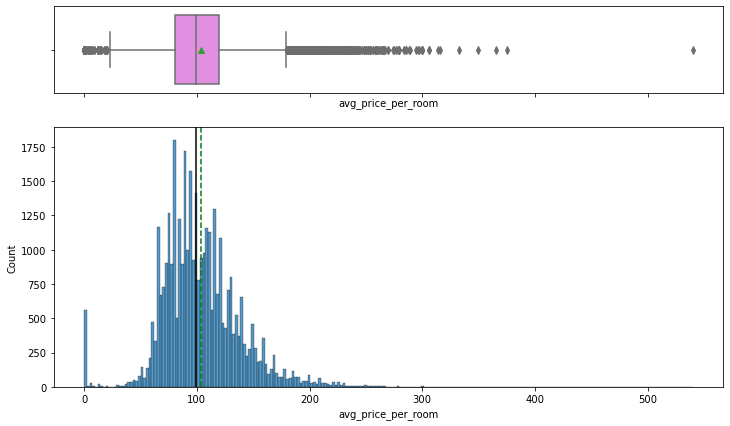

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(df, "avg_price_per_room")

In [40]:
min_price = df["avg_price_per_room"].min()
max_price = df["avg_price_per_room"].max()

print(f" Minimum price for rent a room per night is {min_price}")
print(f" Maximum price for rent a room per night is {max_price}")

 Minimum price for rent a room per night is 0.0
 Maximum price for rent a room per night is 540.0


<IPython.core.display.Javascript object>

### Observation
* The lower range is outlier.
* The upper range can be limited.

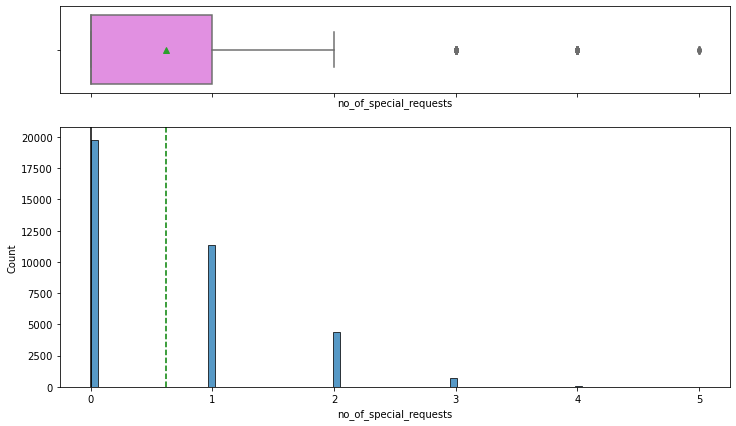

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(df, "no_of_special_requests")

In [42]:
df["no_of_special_requests"].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

<IPython.core.display.Javascript object>

### Observation
* Near 40% of the guests have special request.


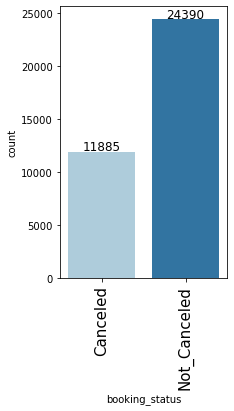

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "booking_status")

### Observation
* Near 30% of the guests canceled their booking.


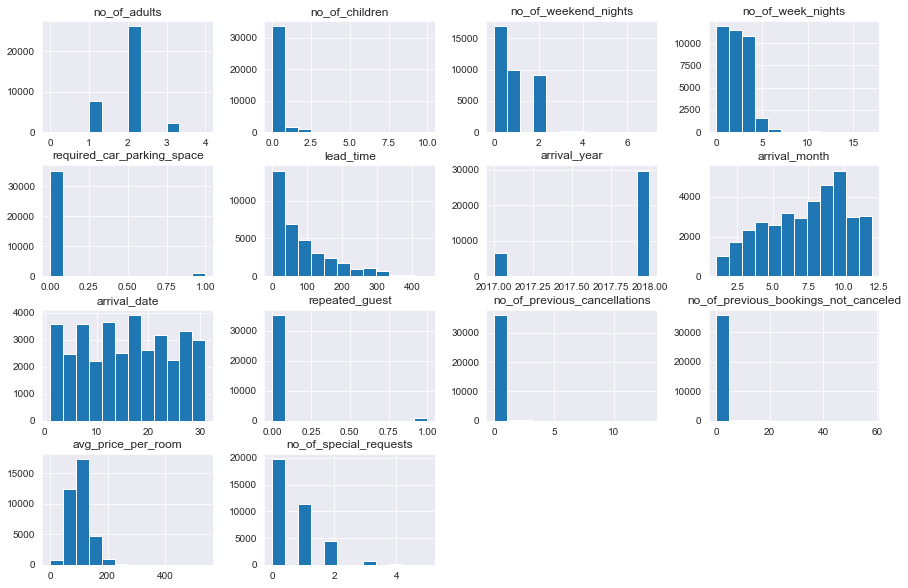

<IPython.core.display.Javascript object>

In [44]:
sns.set_style("darkgrid")
df.hist(figsize=(15, 10), bins=12)
plt.show()

### 3-2 Bivariate Analysis

In [45]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [46]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

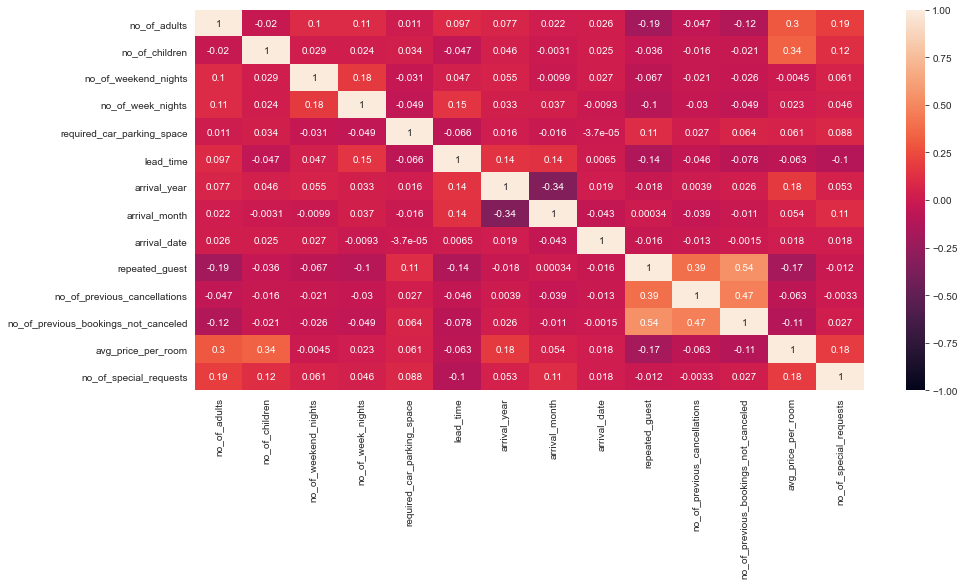

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

### Observation
* repeted guests are correlated to the number of previous booking not canceled (As it is obvious).And also related to the number of cancelation.

* repeated gusts are a littile related to the lead time.
* The other variables are not correlate too much.

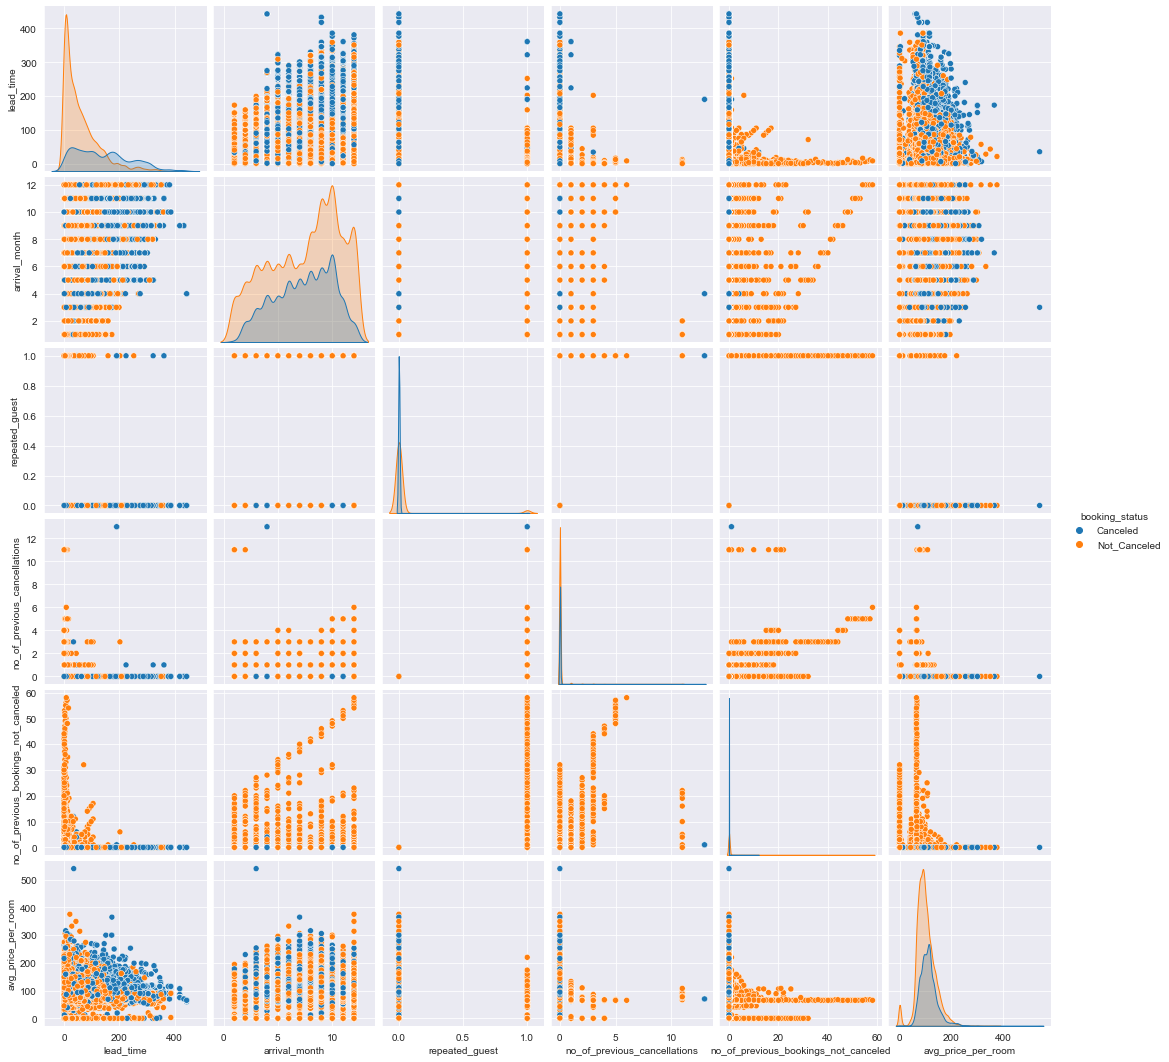

<IPython.core.display.Javascript object>

In [48]:
df_pair = df.copy()
df_pair.drop(
    [
        "no_of_adults",
        "no_of_children",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "arrival_date",
        "no_of_special_requests",
        "arrival_date",
        "arrival_year",
        "required_car_parking_space",
    ],
    axis=1,
    inplace=True,
)
sns.pairplot(df_pair, hue="booking_status")
plt.show()

### Observation
* In some plots the canceled and Not-canceled status can be distinguished.
* But due to large number of data, it is difficult to analyse them using pairplot.

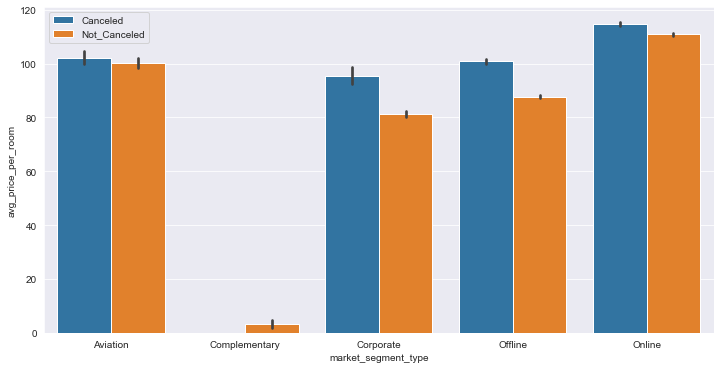

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, x="market_segment_type", y="avg_price_per_room", hue="booking_status"
)

plt.legend(loc="upper left")
plt.show()

### Observation
* The price of the booking is slightly more in online reservation respect to aviation.

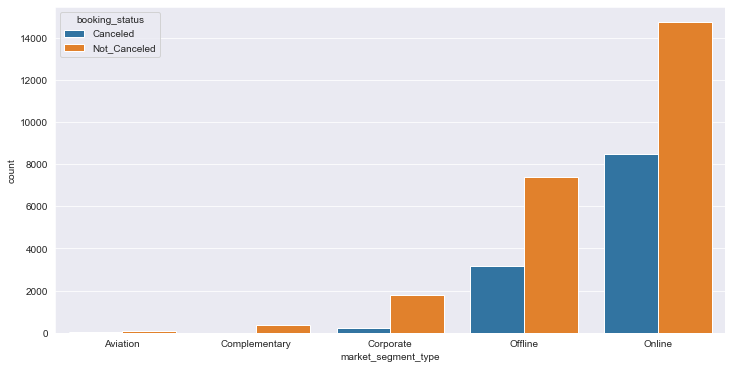

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="market_segment_type", hue="booking_status")
plt.show()

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


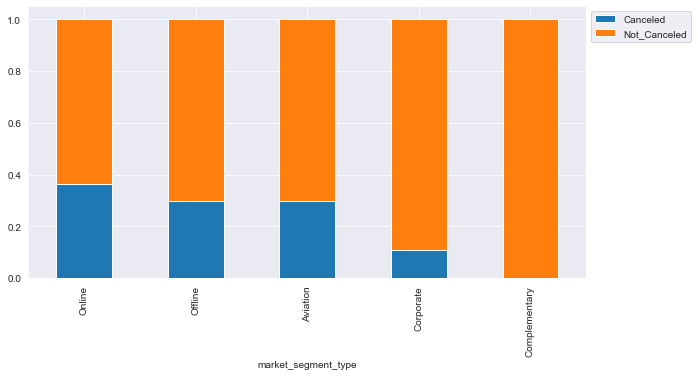

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "market_segment_type", "booking_status")

## Observation
* The most cancelation is happened at online segment.
* The online booking is the most in all market segment types.

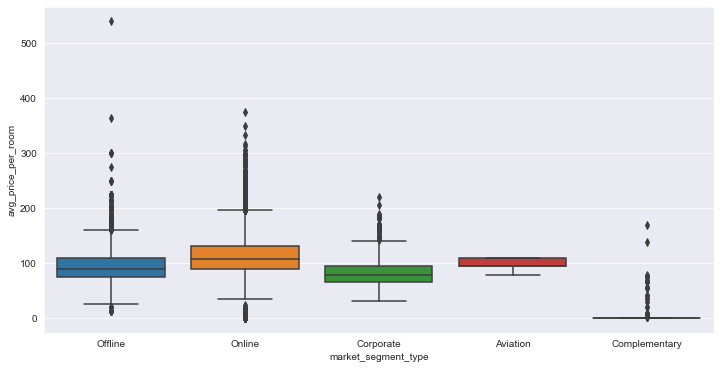

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()

### Observation
* There is an outlier value in offline booking.
* The price in onlien and offline booking is higher than the other type of resevation.

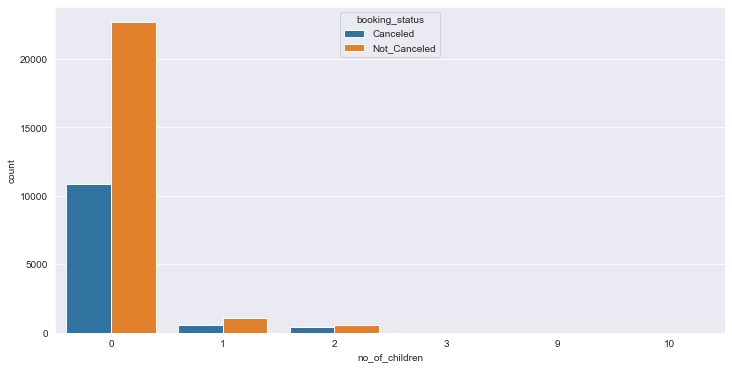

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="no_of_children", hue="booking_status")
plt.show()

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


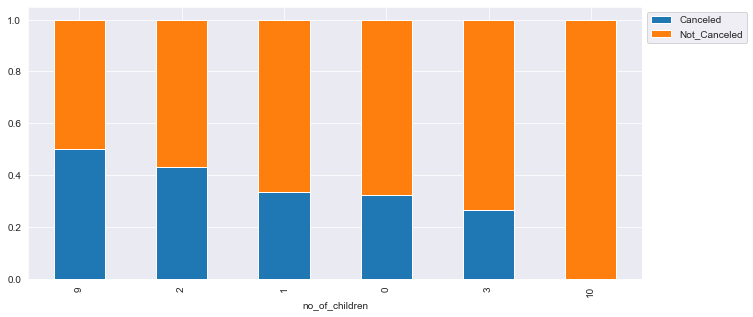

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "no_of_children", "booking_status")

### Observation
* Most of the booking is done with the adults that has no children. 

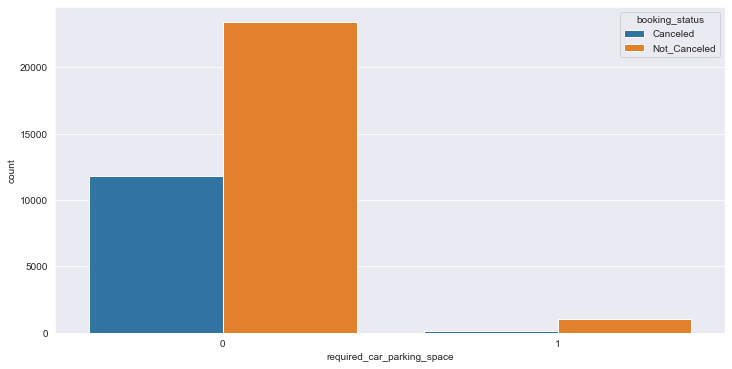

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="required_car_parking_space", hue="booking_status")
plt.show()

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


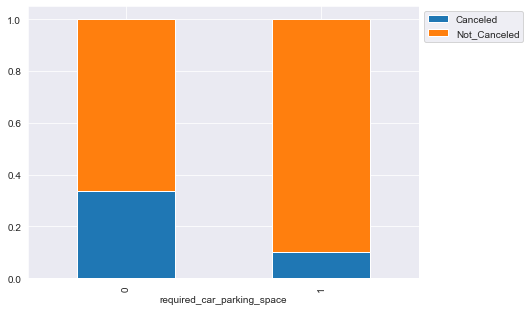

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

### Observation
* parking space request is low.
* When parking is requsted the cancelation amount will be decreased.

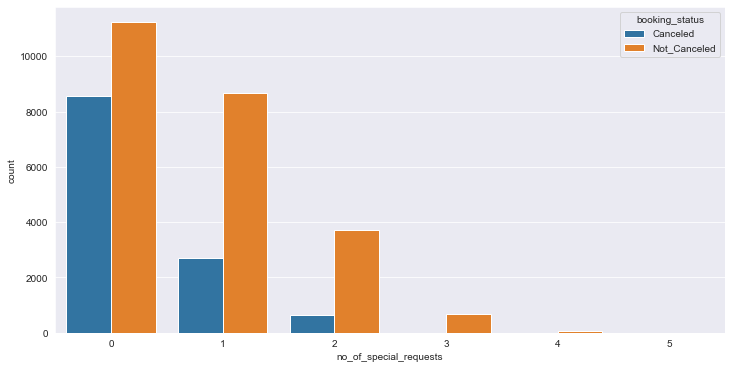

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="no_of_special_requests", hue="booking_status")
plt.show()

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


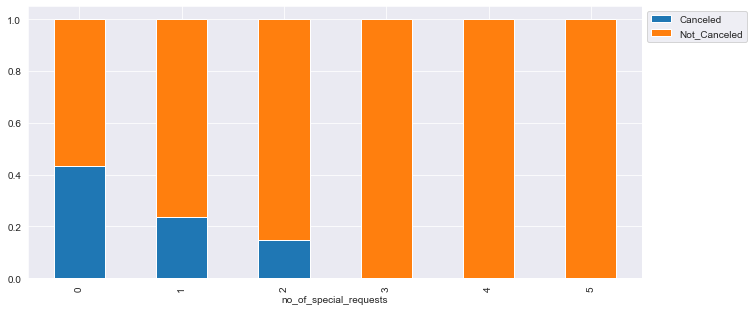

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

### Observation
* Most of the reservation are done without special request.
* When the number of special request is increased, the cancelation number will be decreased.  

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


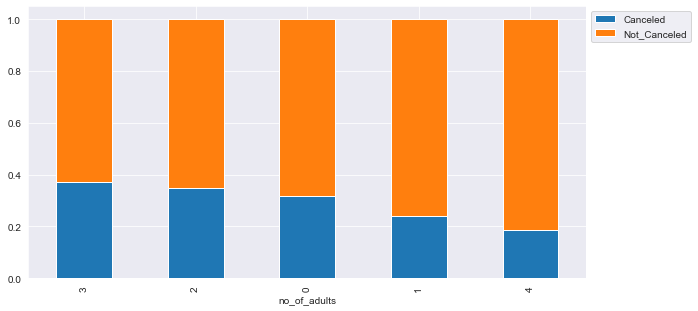

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "no_of_adults", "booking_status")

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


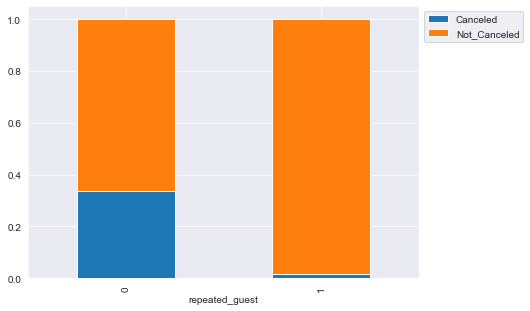

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(data, "repeated_guest", "booking_status")

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


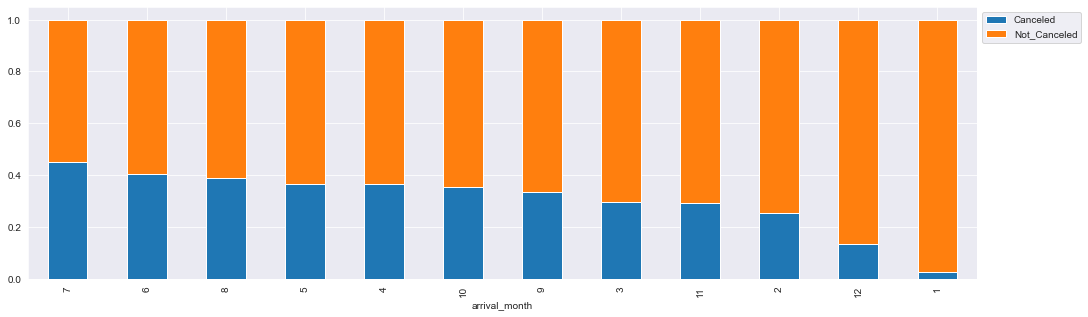

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(data, "arrival_month", "booking_status")

## Observation
* The least cancelation is for the first month.
* The most cancelation is for month 7th. 

## 4- Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### 4-1 Missing value treatment

In [62]:
df1 = df.copy()  # Make a copy of the data

<IPython.core.display.Javascript object>

In [63]:
df1.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

### Observation
* As mentioned before there is no missing value in the data.

### 4-2 Feature engineering

In [64]:
df1.drop(
    ["Booking_ID"], axis=1, inplace=True
)  # drop booking_id column as this information


<IPython.core.display.Javascript object>

In [65]:
df1.sample(5)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
31254             2               0                     2                  3   
3317              2               0                     0                  3   
4843              2               0                     1                  2   
13529             2               0                     0                  2   
33793             2               0                     2                  3   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
31254       Meal Plan 1                           0        Room_Type 1   
3317       Not Selected                           0        Room_Type 1   
4843        Meal Plan 1                           0        Room_Type 1   
13529       Meal Plan 1                           0        Room_Type 1   
33793      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
31254         10          2018             12             3   
3317          37          2018             12             8   
4843          25          2018             10            17   
13529         16          2017              9             9   
33793        200          2018             12             1   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
31254              Online               0                             0   
3317               Online               0                             0   
4843              Offline               0                             0   
13529              Online               0                             0   
33793             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
31254                                     0               89.59   
3317                                      0               88.00   
4843                                      0               85.00   
13529                                     0              105.00   
33793                                     0               51.00   

       no_of_special_requests booking_status  
31254                       0   Not_Canceled  
3317                        0       Canceled  
4843                        0   Not_Canceled  
13529                       2   Not_Canceled  
33793                       0   Not_Canceled

<IPython.core.display.Javascript object>

In [66]:
df1.booking_status = df1.booking_status.apply(lambda x: 1 if x == "Canceled" else 0)
df1["booking_status"] = df1["booking_status"].astype(float)

<IPython.core.display.Javascript object>

In [67]:
replaceStruct = {
    "type_of_meal_plan": {
        "Meal Plan 1": 1,
        "Meal Plan 2": 2,
        "Meal Plan 3": 3,
        "Not Selected": -1,
    },
}

df1 = df1.replace(replaceStruct)

<IPython.core.display.Javascript object>

In [68]:
dummy_col = ["room_type_reserved", "market_segment_type"]
df1 = pd.get_dummies(df1, columns=dummy_col)

<IPython.core.display.Javascript object>

In [69]:
df1.loc[df1["lead_time"] <= 30, "lead_time_category"] = 1
df1.loc[df1["lead_time"] > 30, "lead_time_category"] = 2
df1.loc[df1["lead_time"] > 60, "lead_time_category"] = 3
df1.loc[df1["lead_time"] > 90, "lead_time_category"] = 4
df1.loc[df1["lead_time"] > 120, "lead_time_category"] = 5
df1.loc[df1["lead_time"] > 150, "lead_time_category"] = 6
df1.loc[df1["lead_time"] > 180, "lead_time_category"] = 7
df1.loc[df1["lead_time"] > 210, "lead_time_category"] = 8
df1.loc[df1["lead_time"] > 240, "lead_time_category"] = 9
df1.loc[df1["lead_time"] > 270, "lead_time_category"] = 10
df1.loc[df1["lead_time"] > 300, "lead_time_category"] = 11
df1.loc[df1["lead_time"] > 330, "lead_time_category"] = 12

<IPython.core.display.Javascript object>

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

### 4-3 Outlier detection and treatment

In [71]:
df1.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
room_type_reserved_Room_Type 1          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5          0
room_type_reserved_Room_Type 6          0
room_type_reserved_Room_Type 7          0
market_segment_type_Aviation      

<IPython.core.display.Javascript object>

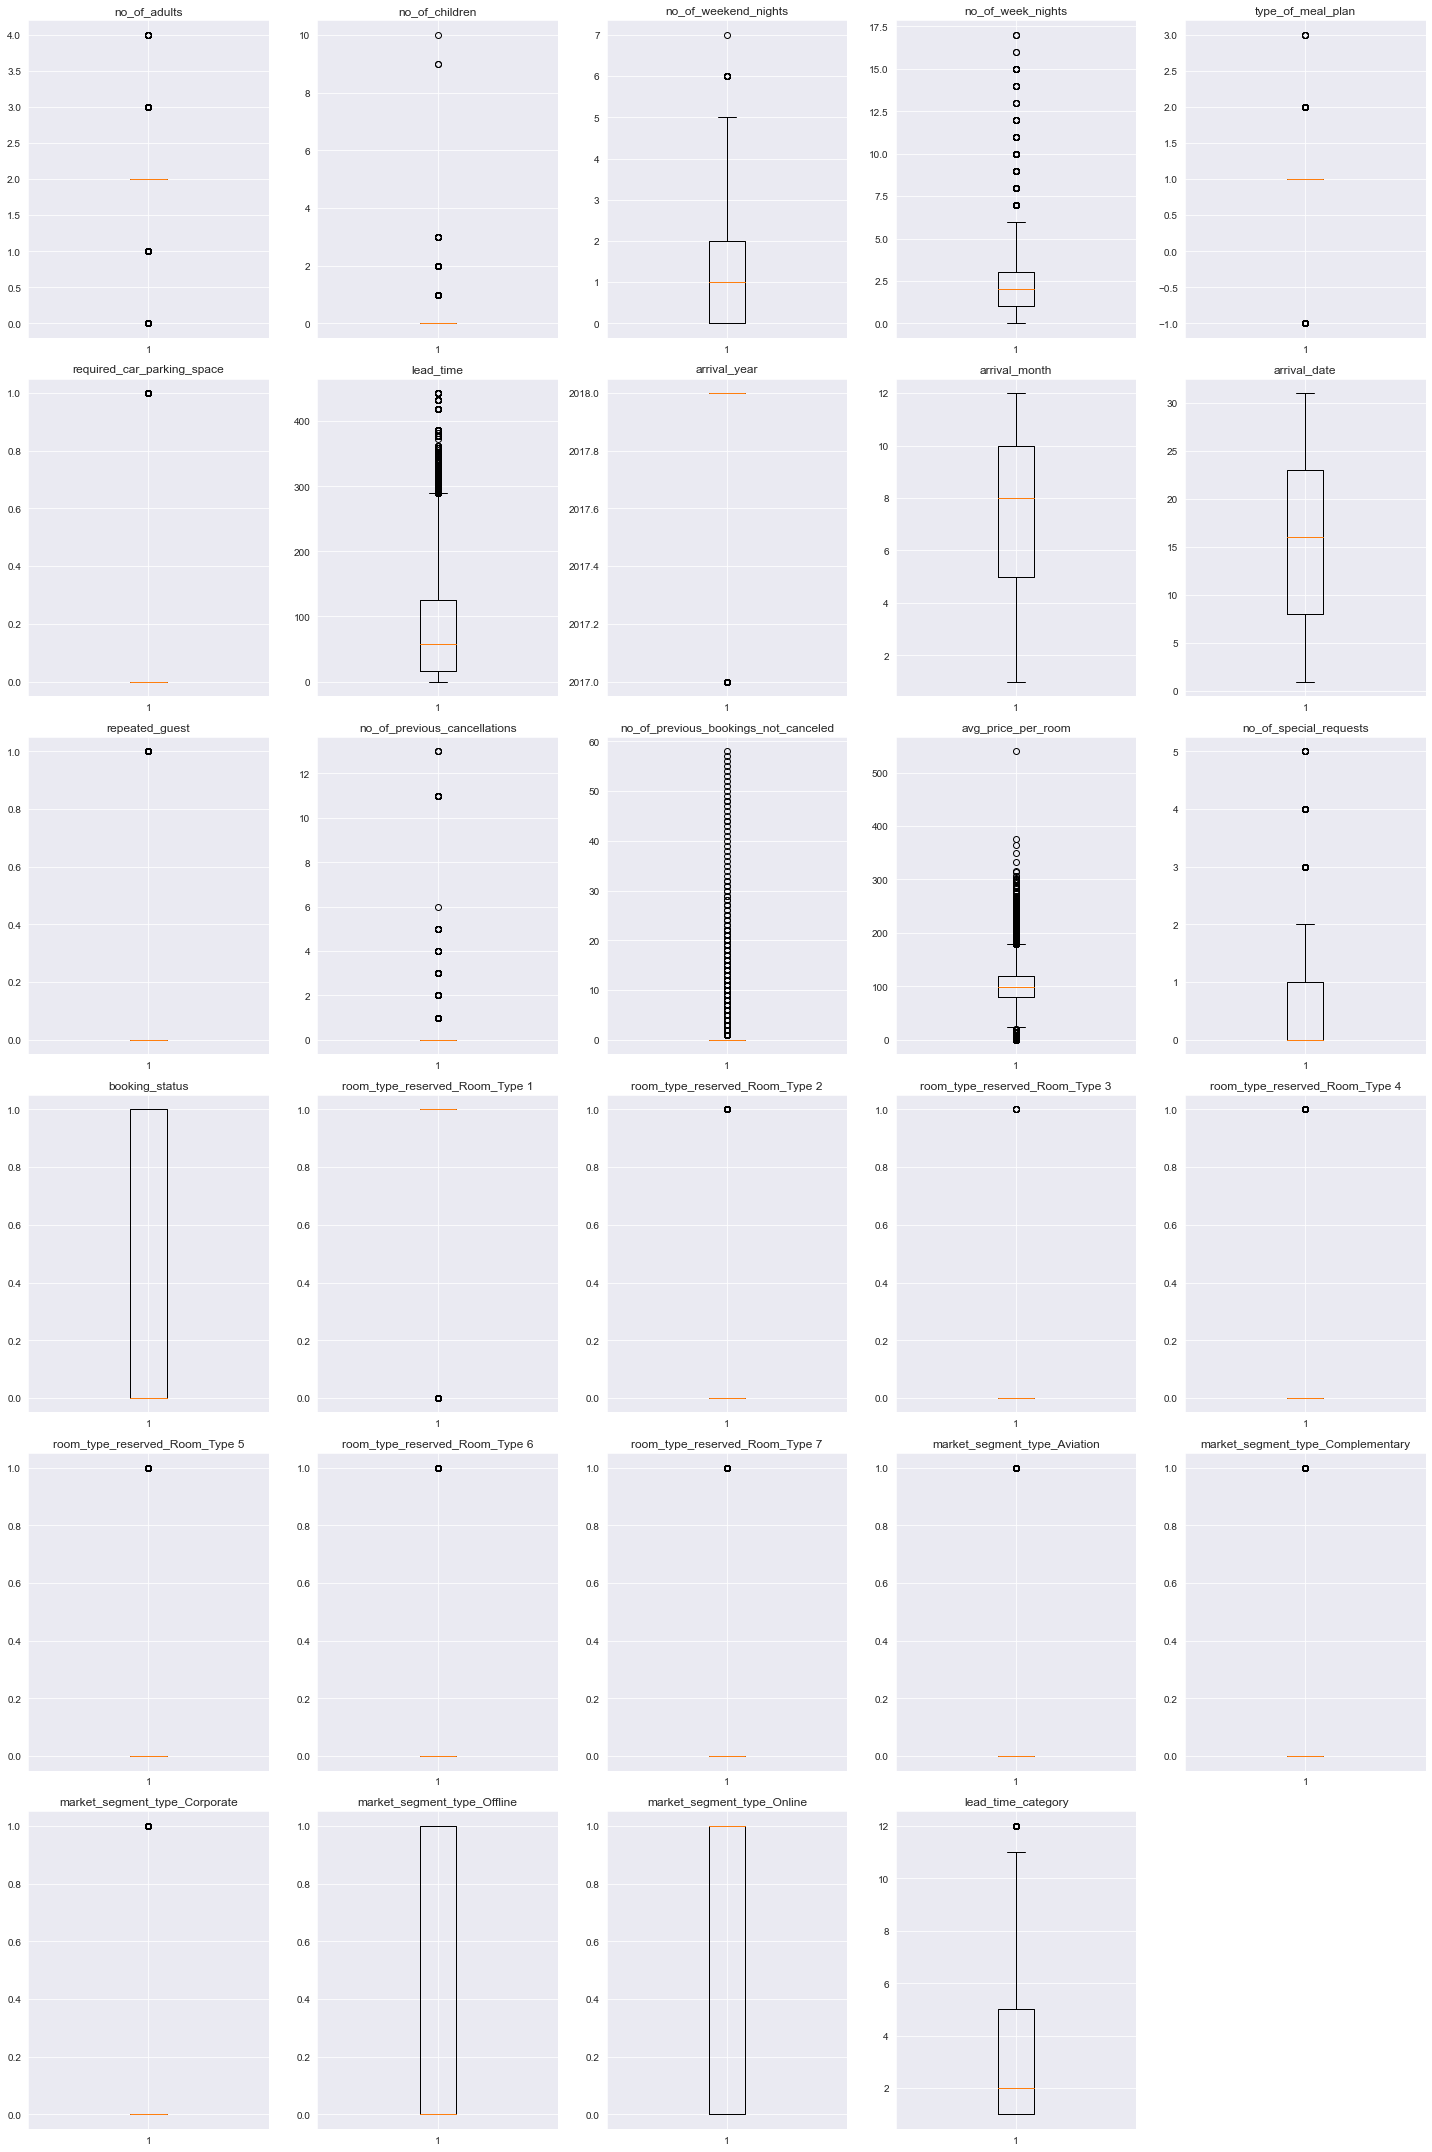

<IPython.core.display.Javascript object>

In [72]:
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [73]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [74]:
selected_col = [
    "avg_price_per_room",
    "lead_time",
    "no_of_week_nights",
    "no_of_weekend_nights",
]
df2 = treat_outliers_all(df1, selected_col)


<IPython.core.display.Javascript object>

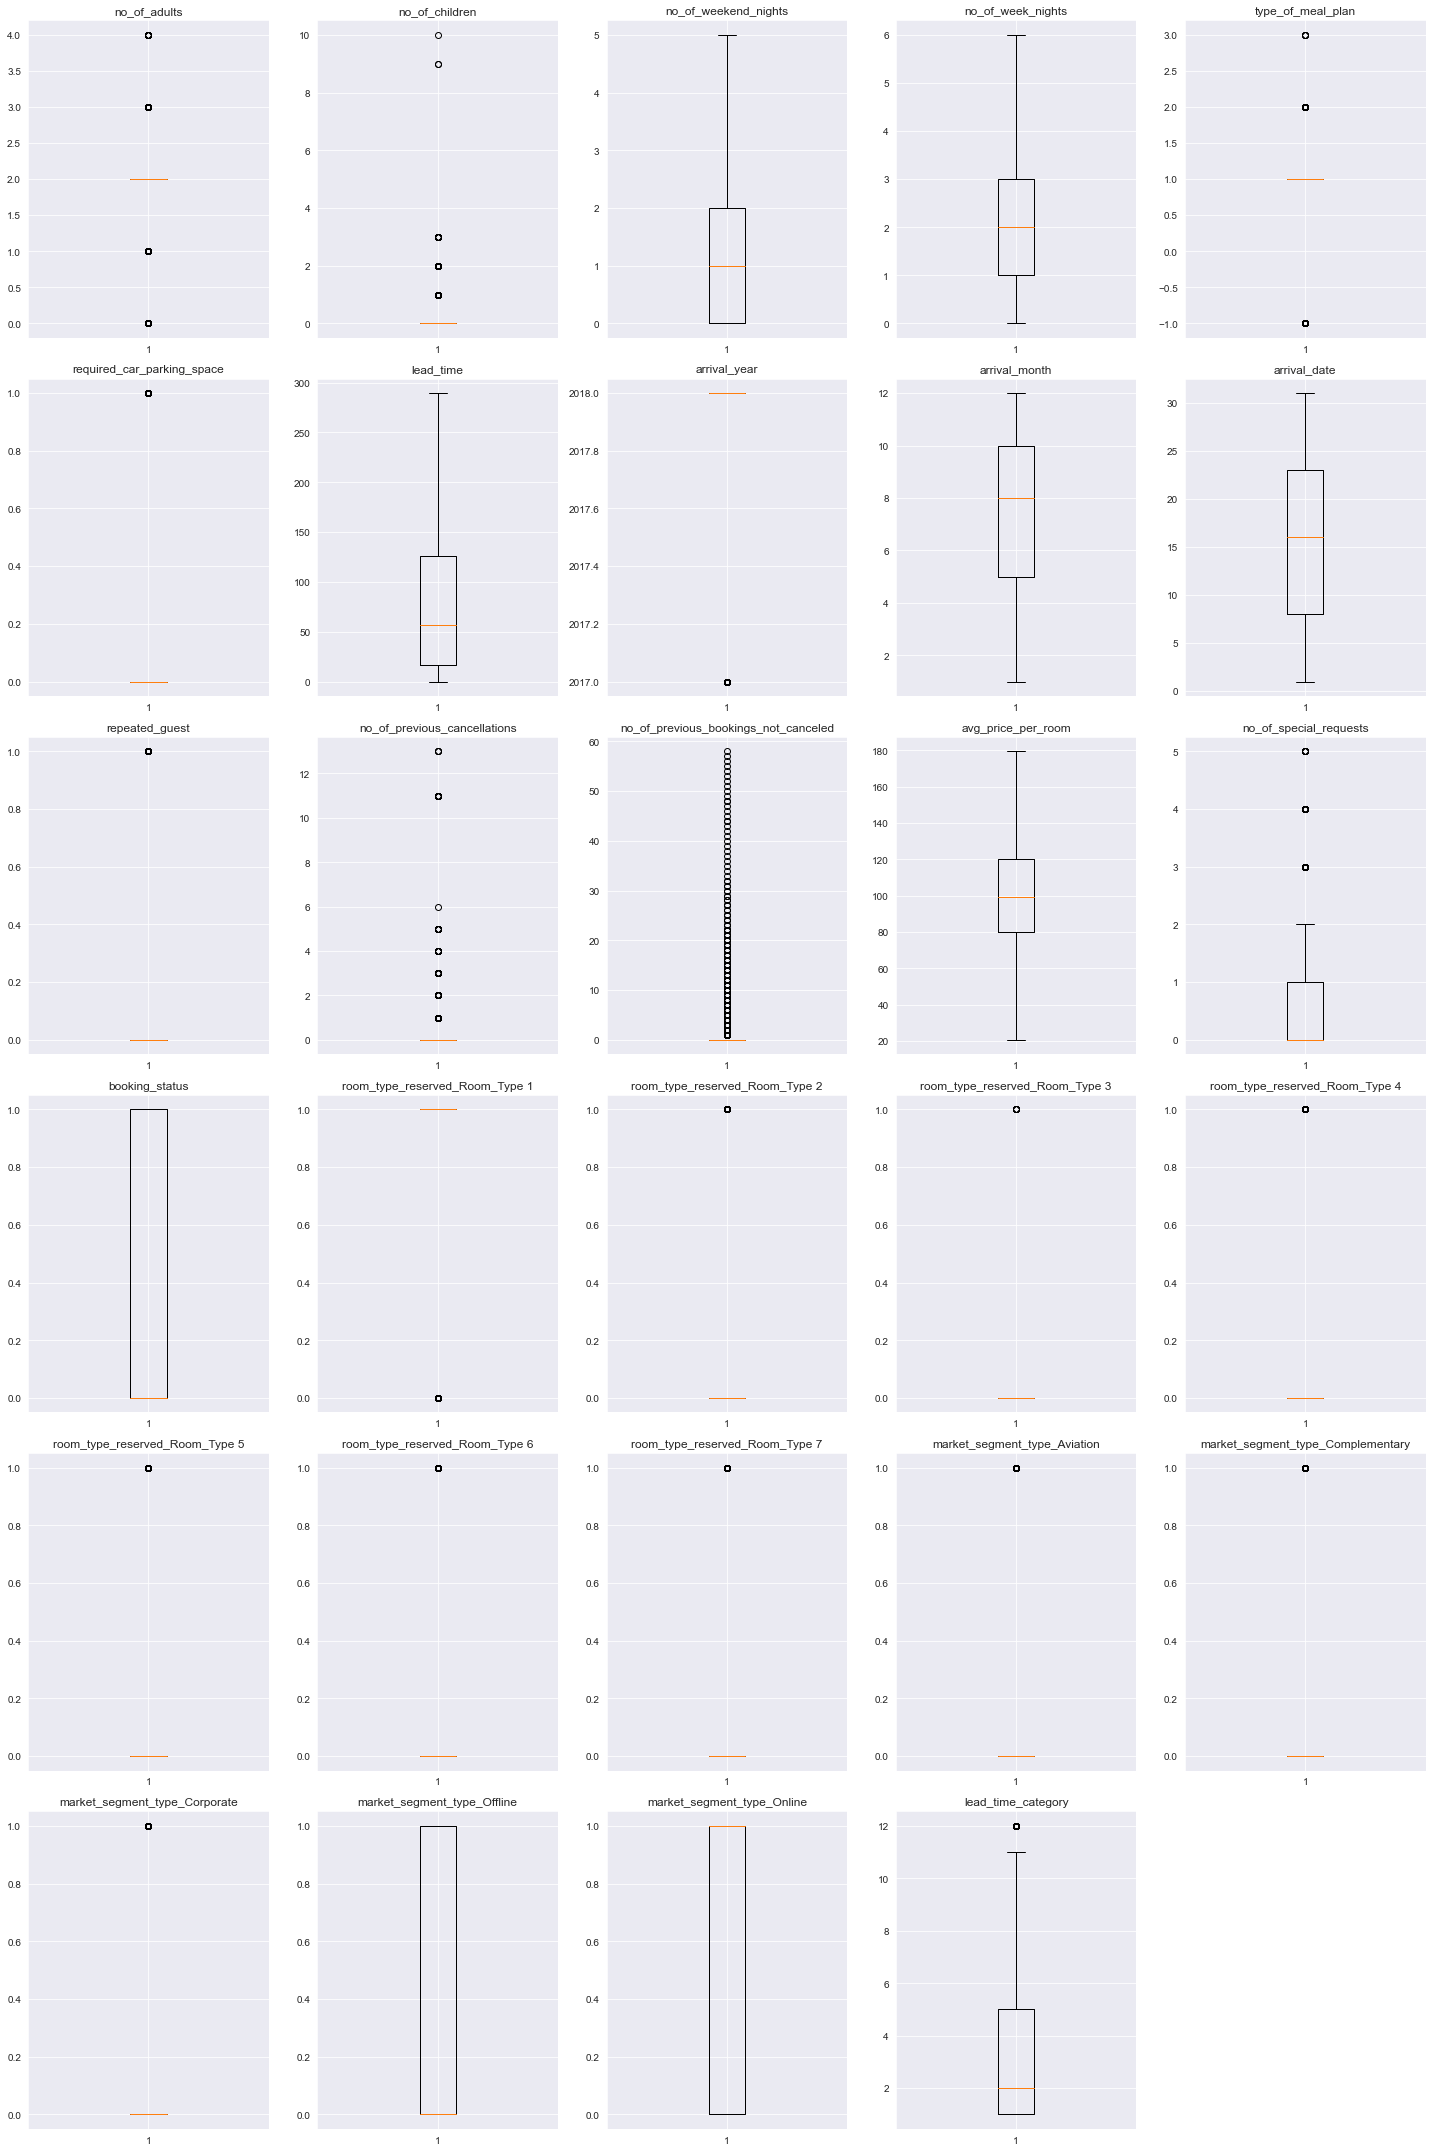

<IPython.core.display.Javascript object>

In [75]:
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## 5- EDA

- It is a good idea to explore the data once again after manipulating it.

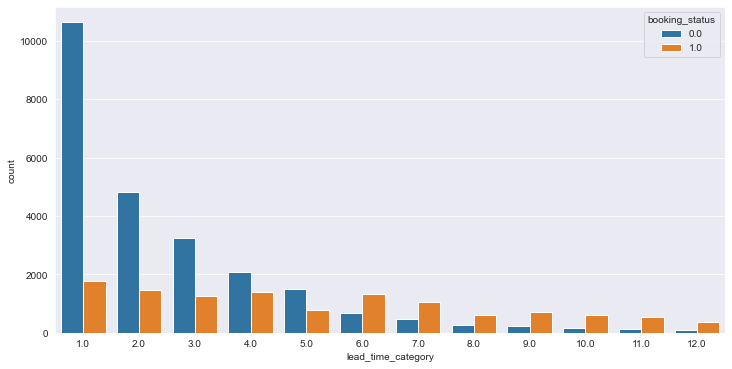

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df2, x="lead_time_category", hue="booking_status")
plt.show()

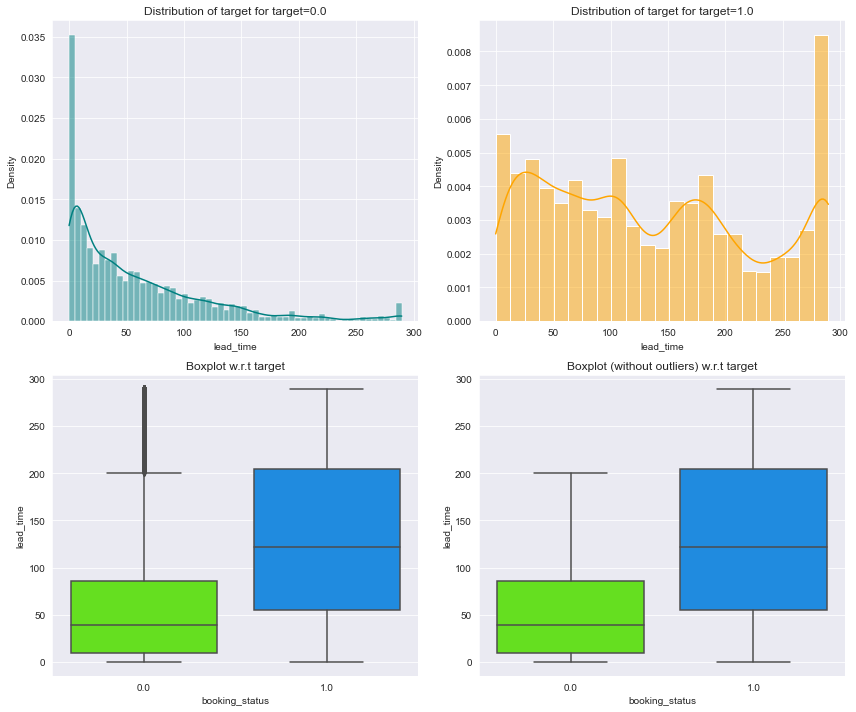

<IPython.core.display.Javascript object>

In [77]:
distribution_plot_wrt_target(df2, "lead_time", "booking_status")

### Observation
* It is obvious that when the lead time is increased above 5 month, the number of cancelation is more than number of not-canceled orders.
* When the reservation is done in the last month, the cancelation is in the lowest percent.

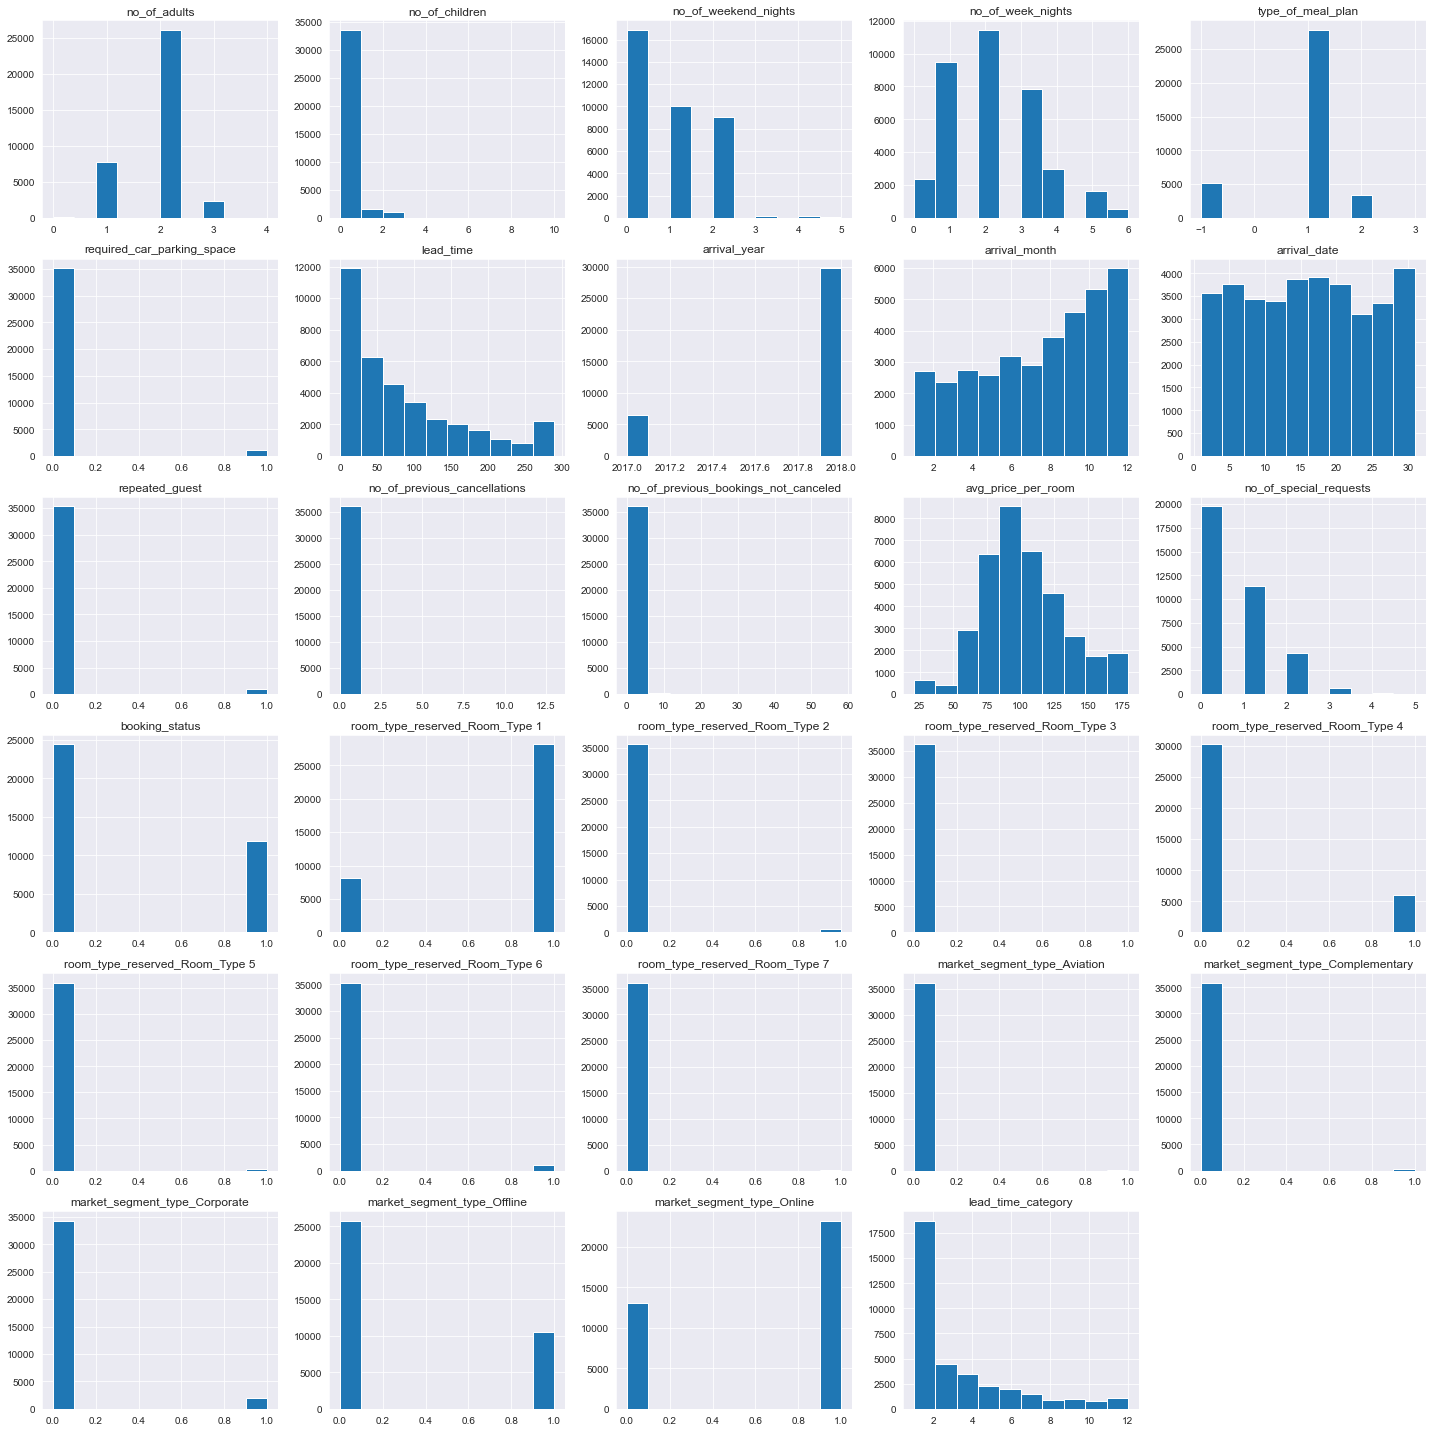

<IPython.core.display.Javascript object>

In [78]:
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(6, 5, i + 1)
    plt.hist(df2[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

## 6- Data Preparation for modeling

### 6-1 Splitting data into train and test

In [79]:
df2.drop(
    ["lead_time_category"], axis=1, inplace=True
)  # drop lead_time_category column as this information is not used more.

X = df2.drop(["booking_status"], axis=1)
Y = df2["booking_status"]

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

* Cheaking some parameters for training and test sets

### 6-2 Check model parameters and performance

In [80]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0.0    0.672377
1.0    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0.0    0.672333
1.0    0.327667
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [81]:
accuracy_score(y_train, np.ones_like(y_train))

0.3276228733459357

<IPython.core.display.Javascript object>

In [82]:
recall_score(y_train, np.ones_like(y_train))

1.0

<IPython.core.display.Javascript object>

In [83]:
precision_score(y_train, np.ones_like(y_train))

0.3276228733459357

<IPython.core.display.Javascript object>

In [84]:
f1_score(y_train, np.ones_like(y_train))

0.4935481000266975

<IPython.core.display.Javascript object>

## 7- Building a Logistic Regression model

### 7-1 Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
* Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking


### Which case is more important?

* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


### How to reduce the losses?
* Hotel would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [85]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [86]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### 7-2 Logistic Regression (with statsmodels library)

In [87]:
X = df2.drop(["booking_status"], axis=1)
Y = df2["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [88]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

         Current function value: 0.422920
         Iterations: 35


C:\Anacoda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>

In [89]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3313
Time:                        18:48:29   Log-Likelihood:                -10739.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -636.8479   7.41e+05     -0.001      0.999   -1.45e+06    1.45e+06
no_of_adults                             0.0414      

<IPython.core.display.Javascript object>

### Checking model performance

In [90]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.806278  0.636014   0.736703  0.682666

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of customer being a defaulter decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer being a defaulter increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### 7-3 Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [91]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print(
    "Series before feature selection: \n\n{}\n".format(
        vif_series.sort_values(ascending=False)
    )
)

C:\Anacoda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Anacoda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Series before feature selection: 

market_segment_type_Online                   inf
room_type_reserved_Room_Type 1               inf
market_segment_type_Offline                  inf
market_segment_type_Corporate                inf
market_segment_type_Complementary            inf
market_segment_type_Aviation                 inf
room_type_reserved_Room_Type 7               inf
room_type_reserved_Room_Type 6               inf
room_type_reserved_Room_Type 5               inf
room_type_reserved_Room_Type 4               inf
room_type_reserved_Room_Type 3               inf
room_type_reserved_Room_Type 2               inf
no_of_children                          1.999380
avg_price_per_room                      1.896121
repeated_guest                          1.750991
no_of_previous_bookings_not_canceled    1.570349
arrival_year                            1.403503
type_of_meal_plan                       1.399971
lead_time                               1.370191
no_of_adults                      

<IPython.core.display.Javascript object>

In [92]:
X_train1 = X_train.drop(
    [
        "market_segment_type_Online",
        "market_segment_type_Offline",
        "market_segment_type_Corporate",
        "market_segment_type_Complementary",
        "market_segment_type_Aviation",
    ],
    axis=1,
)


vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print(
    "Series before feature selection: \n\n{}\n".format(
        vif_series2.sort_values(ascending=False)
    )
)

Series before feature selection: 

room_type_reserved_Room_Type 7               inf
room_type_reserved_Room_Type 6               inf
room_type_reserved_Room_Type 5               inf
room_type_reserved_Room_Type 4               inf
room_type_reserved_Room_Type 3               inf
room_type_reserved_Room_Type 2               inf
room_type_reserved_Room_Type 1               inf
no_of_children                          1.990595
avg_price_per_room                      1.610823
repeated_guest                          1.559362
no_of_previous_bookings_not_canceled    1.556637
arrival_year                            1.389348
no_of_previous_cancellations            1.307243
lead_time                               1.294502
no_of_adults                            1.293707
arrival_month                           1.265042
type_of_meal_plan                       1.203315
no_of_special_requests                  1.134035
no_of_week_nights                       1.076705
no_of_weekend_nights              

<IPython.core.display.Javascript object>

In [93]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Optimization terminated successfully.
         Current function value: 0.448115
         Iterations 15
Training performance:


Accuracy  Recall  Precision        F1
0  0.788674  0.5812   0.719815  0.643123

<IPython.core.display.Javascript object>

In [94]:
X_train2 = X_train1.drop(
    [
        "room_type_reserved_Room_Type 1",
        "room_type_reserved_Room_Type 2",
        "room_type_reserved_Room_Type 3",
        "room_type_reserved_Room_Type 4",
        "room_type_reserved_Room_Type 5",
        "room_type_reserved_Room_Type 6",
        "room_type_reserved_Room_Type 7",
    ],
    axis=1,
)


vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print(
    "Series before feature selection: \n\n{}\n".format(
        vif_series3.sort_values(ascending=False)
    )
)

Series before feature selection: 

const                                   3.791137e+07
no_of_previous_bookings_not_canceled    1.554995e+00
repeated_guest                          1.551673e+00
avg_price_per_room                      1.452163e+00
arrival_year                            1.372549e+00
no_of_previous_cancellations            1.306709e+00
arrival_month                           1.263378e+00
lead_time                               1.260392e+00
no_of_adults                            1.224156e+00
type_of_meal_plan                       1.170730e+00
no_of_children                          1.138765e+00
no_of_special_requests                  1.126482e+00
no_of_week_nights                       1.065280e+00
no_of_weekend_nights                    1.034507e+00
required_car_parking_space              1.028674e+00
arrival_date                            1.005543e+00
dtype: float64



<IPython.core.display.Javascript object>

In [95]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Optimization terminated successfully.
         Current function value: 0.449142
         Iterations 16
Training performance:


Accuracy    Recall  Precision        F1
0   0.78702  0.577233   0.717466  0.639755

<IPython.core.display.Javascript object>

**Observations:**
1. Dropping market_segment_type and room_type_reserved doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Here, we will go with the lg2 model.
4. All of the categorical levels of a variable have VIF<5 which is good.

In [96]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.2899
Time:                        18:48:36   Log-Likelihood:                -11405.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1212.5748    115.100    -10.535      0.000   -1438.166    -986.984
no_of_adults                             0.0919      

<IPython.core.display.Javascript object>

* We will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [97]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']


<IPython.core.display.Javascript object>

In [98]:
X_train3 = X_train2[selected_features]

<IPython.core.display.Javascript object>

In [99]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.449404
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           13
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.2895
Time:                        18:48:39   Log-Likelihood:                -11411.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1202.1109    115.119    -10.442      0.00

<IPython.core.display.Javascript object>

In [100]:
print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.787138  0.577473   0.717658  0.639979

<IPython.core.display.Javascript object>

###  7-4 Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, odds = exp(b)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [101]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

const  no_of_adults  no_of_weekend_nights  no_of_week_nights  \
Odds           0.0      1.089464              1.226745           1.032097   
Change_odd% -100.0      8.946383             22.674519           3.209689   

             type_of_meal_plan  required_car_parking_space  lead_time  \
Odds                  0.694660                    0.245988   1.014492   
Change_odd%         -30.534044                  -75.401164   1.449175   

             arrival_year  arrival_month  arrival_date  repeated_guest  \
Odds             1.811065       0.951089      1.004270        0.079137   
Change_odd%     81.106544      -4.891070      0.426974      -92.086280   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.266534            1.023714   
Change_odd%                     26.653447            2.371355   

             no_of_special_requests  
Odds                       0.308737  
Change_odd%              -69.126284

<IPython.core.display.Javascript object>

### Coefficient interpretations

* "avg_price_per_room": Holding all other features constant, 1 unit change in avg_price_per_room will increase the odds of Hotel cancelation by 1.02 times or a 2.3% increase in odds of having cancelation.

* Interpretation for other attributes can be done similarly.

### 7-5 Model performance evaluation

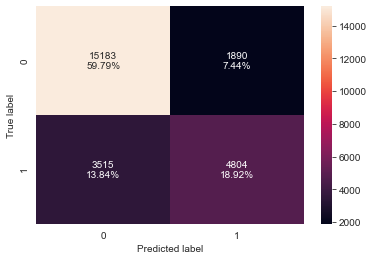

<IPython.core.display.Javascript object>

In [102]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=0.5)

In [103]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=0.5
)
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.787138  0.577473   0.717658  0.639979

<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

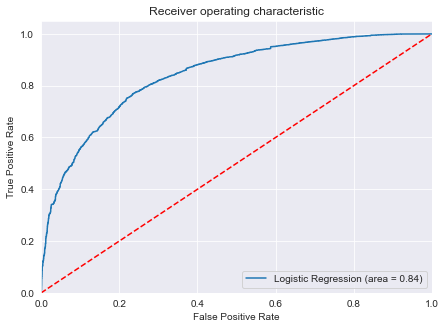

<IPython.core.display.Javascript object>

In [104]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* We could probably improve performance of logistic Regression model on training set by playing with threshold.

### 7-6 Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [105]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3178870183397934


<IPython.core.display.Javascript object>

#### Checking model performance on training set

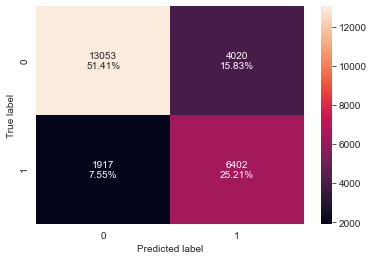

<IPython.core.display.Javascript object>

In [106]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [107]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.766186  0.769564   0.614277  0.683208

<IPython.core.display.Javascript object>

* Recall and F1 score of model has increased but the other metrics have reduced.
* The model is giving a good performance. But the Recall and Percision is not in the highest optimization and can be improved.

#### Let's use Precision-Recall curve and see if we can find a better threshold

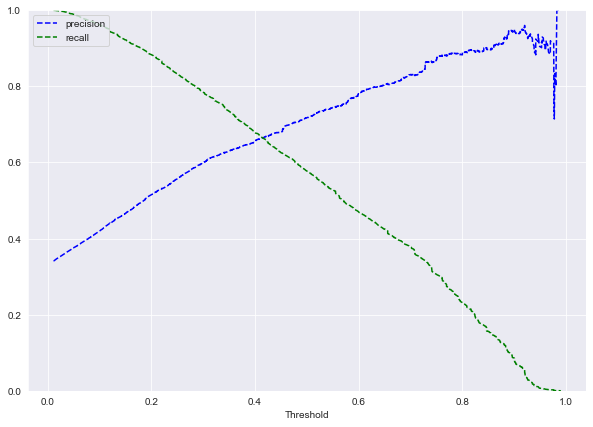

<IPython.core.display.Javascript object>

In [108]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.415, we get balanced recall and precision.

In [109]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

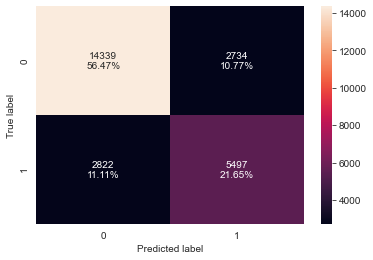

<IPython.core.display.Javascript object>

In [110]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [111]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision       F1
0  0.781191  0.660777   0.667841  0.66429

<IPython.core.display.Javascript object>

* Model is performing good on training set.
* There's a little improvement in the model performance (F1 from 0.63 to 0.66) as the default threshold is 0.50 and here we get 0.415 as the optimal threshold.

### 7-7 Final Model Summary

#### Model Performance Summary

In [112]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.787138   
Recall                                        0.577473   
Precision                                     0.717658   
F1                                            0.639979   

           Logistic Regression-0.31 Threshold  \
Accuracy                             0.766186   
Recall                               0.769564   
Precision                            0.614277   
F1                                   0.683208   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.781191  
Recall                               0.660777  
Precision                            0.667841  
F1                                   0.664290

<IPython.core.display.Javascript object>

#### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [113]:
X_test3 = X_test[list(X_train3.columns)]

<IPython.core.display.Javascript object>

#### Using model with default threshold

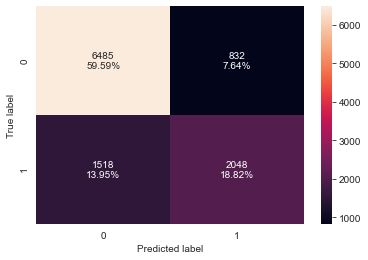

<IPython.core.display.Javascript object>

In [114]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [115]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.784067  0.574313   0.711111  0.635433

<IPython.core.display.Javascript object>

#### ROC curve on test set

* ROC curve on test set

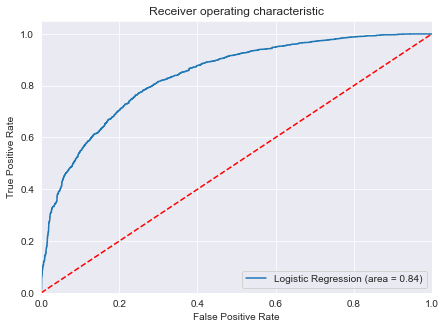

<IPython.core.display.Javascript object>

In [116]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.317** 

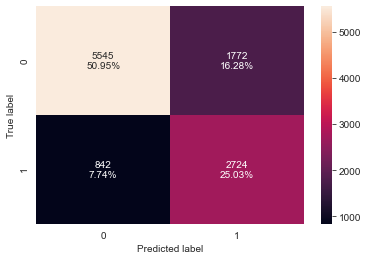

<IPython.core.display.Javascript object>

In [117]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [118]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.759809  0.763881   0.605872  0.675763

<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

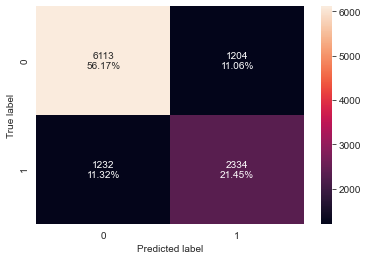

<IPython.core.display.Javascript object>

In [119]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [120]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.776165  0.654515   0.659695  0.657095

<IPython.core.display.Javascript object>

#### Model performance summary

In [121]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.787138   
Recall                                        0.577473   
Precision                                     0.717658   
F1                                            0.639979   

           Logistic Regression-0.31 Threshold  \
Accuracy                             0.766186   
Recall                               0.769564   
Precision                            0.614277   
F1                                   0.683208   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.781191  
Recall                               0.660777  
Precision                            0.667841  
F1                                   0.664290

<IPython.core.display.Javascript object>

In [122]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.784067   
Recall                                        0.574313   
Precision                                     0.711111   
F1                                            0.635433   

           Logistic Regression-0.31 Threshold  \
Accuracy                             0.759809   
Recall                               0.763881   
Precision                            0.605872   
F1                                   0.675763   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.776165  
Recall                               0.654515  
Precision                            0.659695  
F1                                   0.657095

<IPython.core.display.Javascript object>

## Conclusion

* We have been able to build a predictive model that can be used by the INN Hotels to find that what is the chance of cancelation with f1 score of 0.65 with threshold of 0.42 and formulate it.

* All the logistic regression models have given a generalized performance on the training and test set.

* Using logistic regression method and playing with threshold parameret shows that the recall and precision did not increase a lot and so the result of f1 score is not too robust. 

* The data also was not balanced when trying logistic model on the data.

* Finally some feature selection were done on the data to make the data more robust.

## 8- Building a Decision Tree model

In [123]:
X = df2.drop(["booking_status"], axis=1)
Y = df2["booking_status"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix

In [124]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [125]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## 8-1 Build the model

**We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.** 

In [126]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking model performance on training set

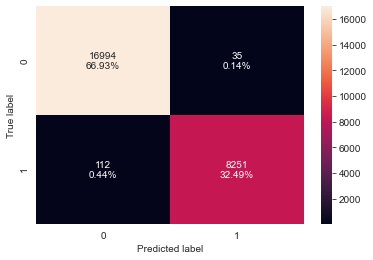

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(dTree, X_train, y_train)

In [128]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

<IPython.core.display.Javascript object>

### Checking model performance on testing set

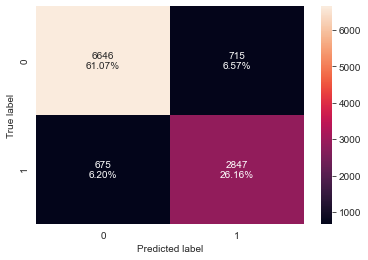

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [130]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.872278  0.808348    0.79927  0.803783

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

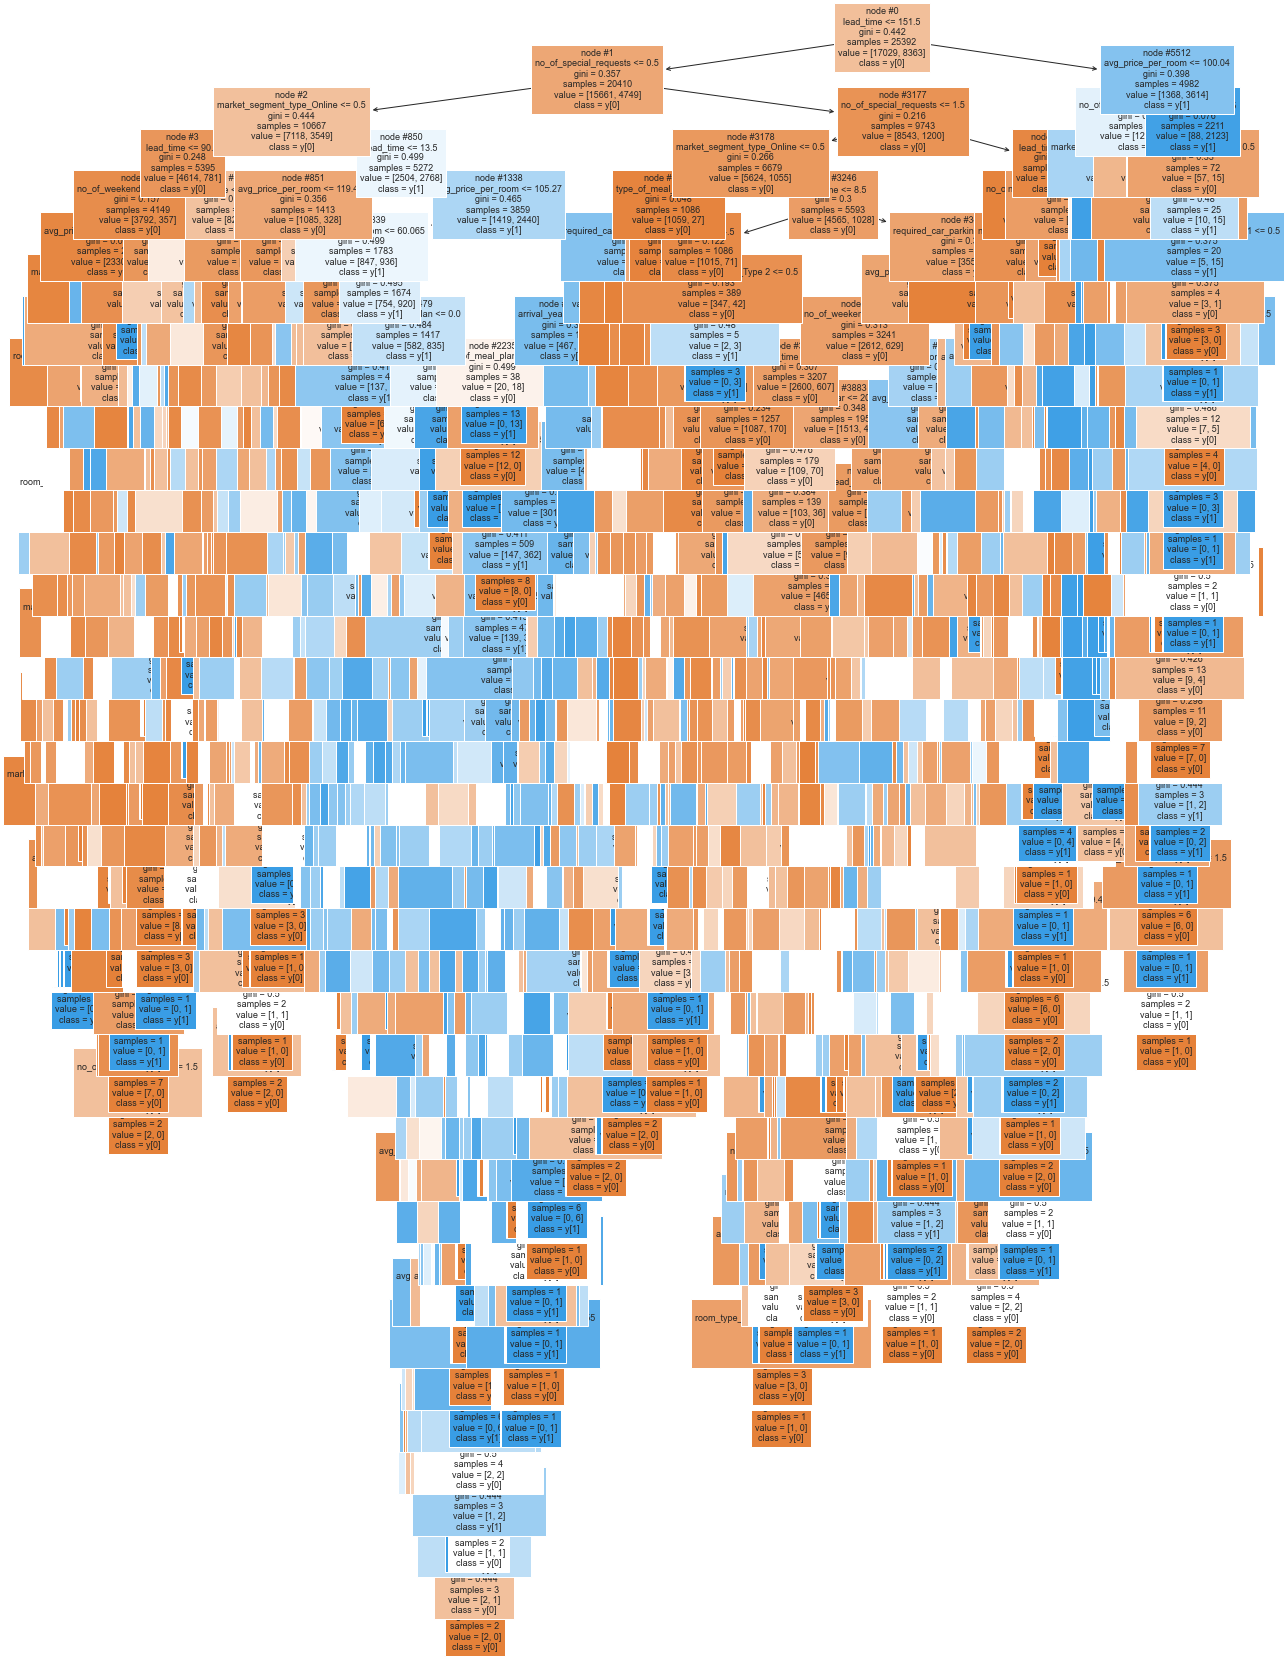

<IPython.core.display.Javascript object>

In [131]:
feature_names = list(X.columns)

plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [132]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0.0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Ty

<IPython.core.display.Javascript object>

In [133]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.350426
avg_price_per_room                    0.169167
market_segment_type_Online            0.093218
arrival_date                          0.085588
no_of_special_requests                0.067350
arrival_month                         0.063954
no_of_week_nights                     0.044595
no_of_weekend_nights                  0.041870
no_of_adults                          0.027230
type_of_meal_plan                     0.014130
arrival_year                          0.012097
required_car_parking_space            0.006614
no_of_children                        0.005075
room_type_reserved_Room_Type 4        0.004837
room_type_reserved_Room_Type 1        0.004795
market_segment_type_Offline           0.002930
room_type_reserved_Room_Type 2        0.001758
room_type_reserved_Room_Type 5        0.000983
market_segment_type_Corporate         0.000784
room_type_reserved_Room_Type 7        0.000773
repeated_gues

<IPython.core.display.Javascript object>

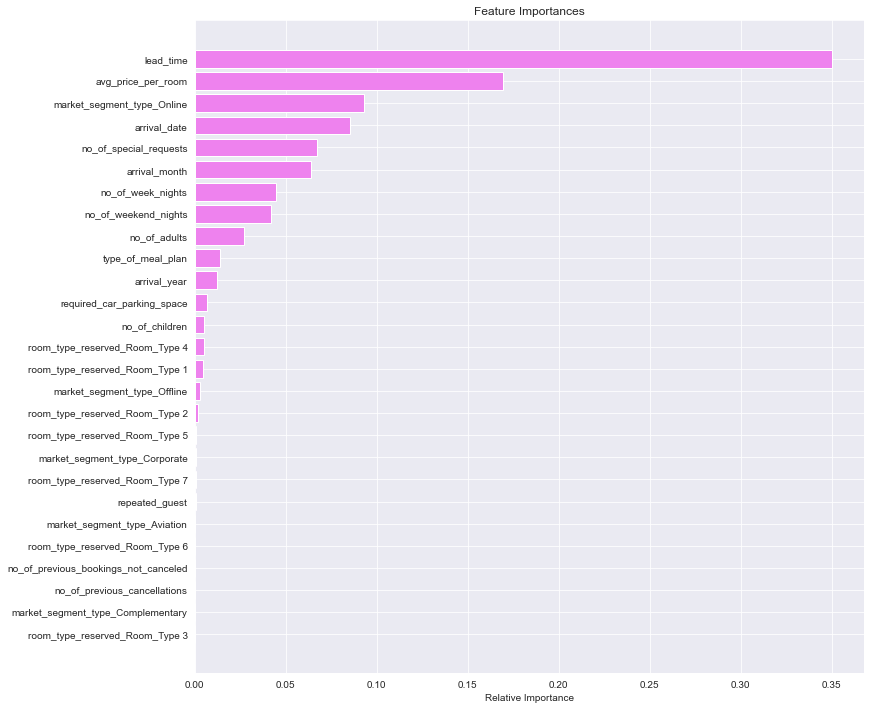

<IPython.core.display.Javascript object>

In [134]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead_time is the most important variable for predicting the customer default.

**The tree above is very complex, such a tree often overfits.**

## 8-2 Do we need to prune the tree?

### 8-2-1 Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [135]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "max_leaf_nodes": [50, 75, 150, 250],
    "splitter": ["best", "random"],
    "criterion": ["entropy", "gini"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_leaf_nodes=250, min_impurity_decrease=1e-05,
                       random_state=1)

<IPython.core.display.Javascript object>

### Checking model performance on training set

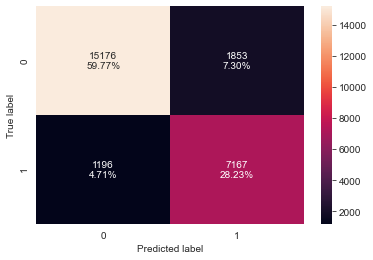

<IPython.core.display.Javascript object>

In [136]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [137]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.879923  0.856989   0.794568  0.824599

<IPython.core.display.Javascript object>

### Checking model performance on testing set

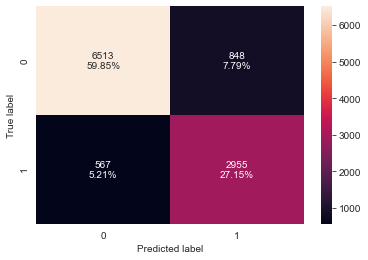

<IPython.core.display.Javascript object>

In [138]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [139]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.869981  0.839012   0.777018  0.806826

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

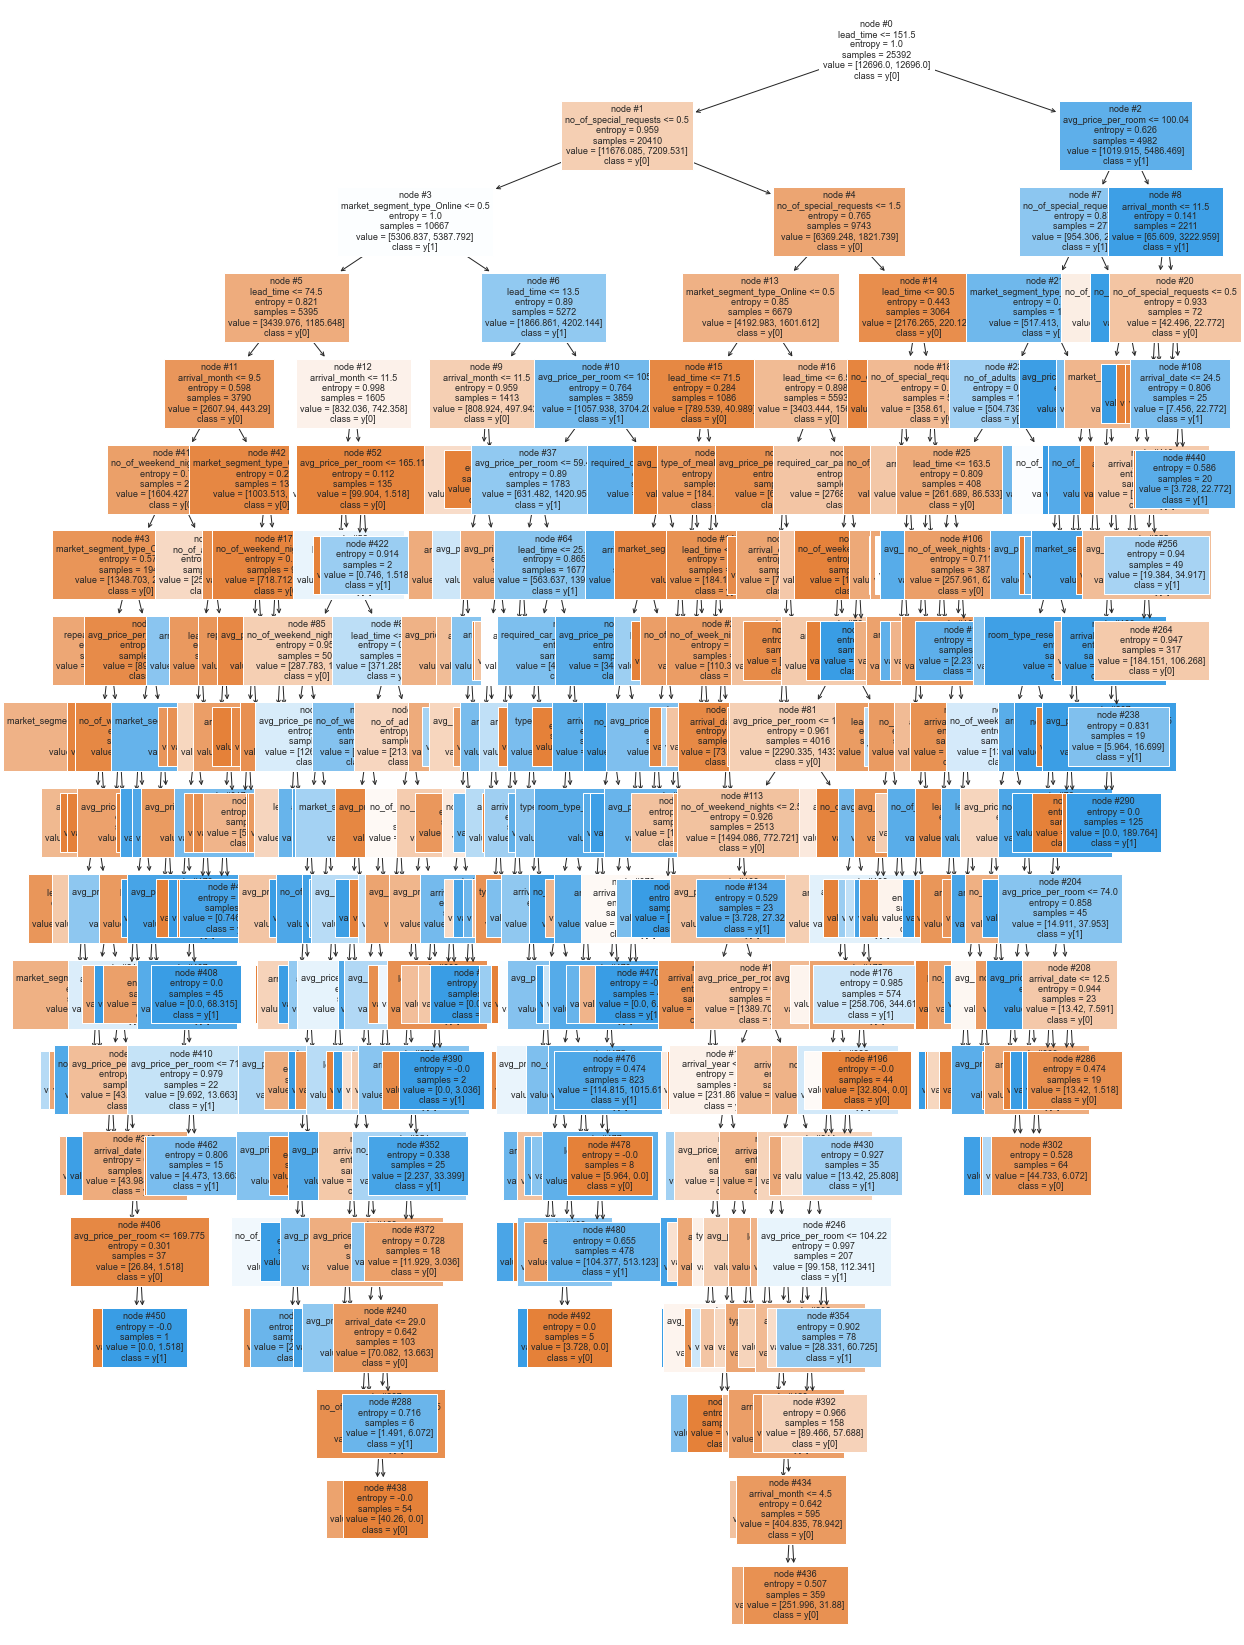

<IPython.core.display.Javascript object>

In [140]:
feature_names = list(X.columns)

plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [141]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- market_segment_type_Complementary <= 0.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 30.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [91.70, 9.11] class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  30.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [9.69, 7.59] class: 0.0
|   |   |   |   |   |   |   |   |   |--- arrival_date >  11.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of 

<IPython.core.display.Javascript object>

In [142]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.355371
market_segment_type_Online            0.138466
avg_price_per_room                    0.131435
no_of_special_requests                0.126682
arrival_month                         0.085446
no_of_weekend_nights                  0.038676
no_of_adults                          0.029807
no_of_week_nights                     0.023794
arrival_date                          0.020978
arrival_year                          0.013810
required_car_parking_space            0.011676
type_of_meal_plan                     0.006148
market_segment_type_Corporate         0.005068
market_segment_type_Offline           0.004843
repeated_guest                        0.003012
room_type_reserved_Room_Type 4        0.001511
market_segment_type_Complementary     0.001281
no_of_children                        0.001206
room_type_reserved_Room_Type 5        0.000792
room_type_reserved_Room_Type 7        0.000000
market_segmen

<IPython.core.display.Javascript object>

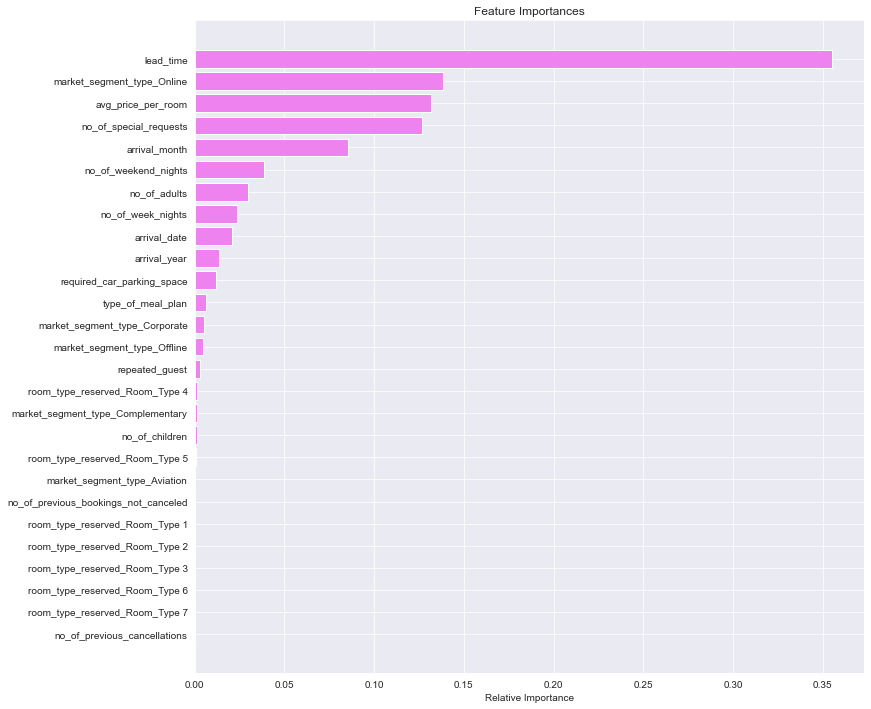

<IPython.core.display.Javascript object>

In [143]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### 8-2-2 Cost Complexity Pruning

In [144]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [145]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     1.303920e-20    0.008376
3     1.303920e-20    0.008376
4     1.303920e-20    0.008376
...            ...         ...
1904  8.901596e-03    0.328058
1905  9.802243e-03    0.337860
1906  1.271875e-02    0.350579
1907  3.412090e-02    0.418821
1908  8.117914e-02    0.500000

[1909 rows x 2 columns]

<IPython.core.display.Javascript object>

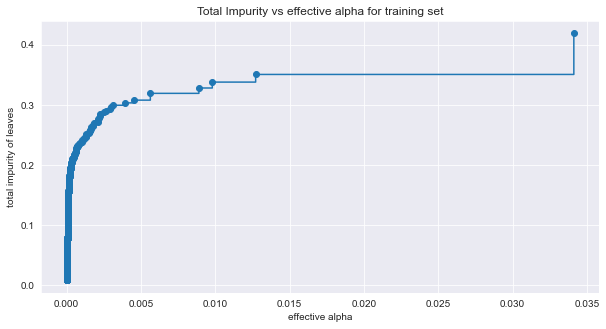

<IPython.core.display.Javascript object>

In [146]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [147]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136949


<IPython.core.display.Javascript object>

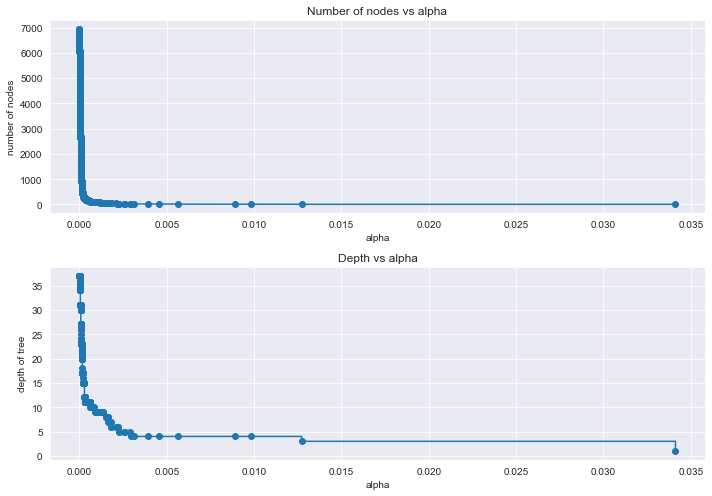

<IPython.core.display.Javascript object>

In [148]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [149]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

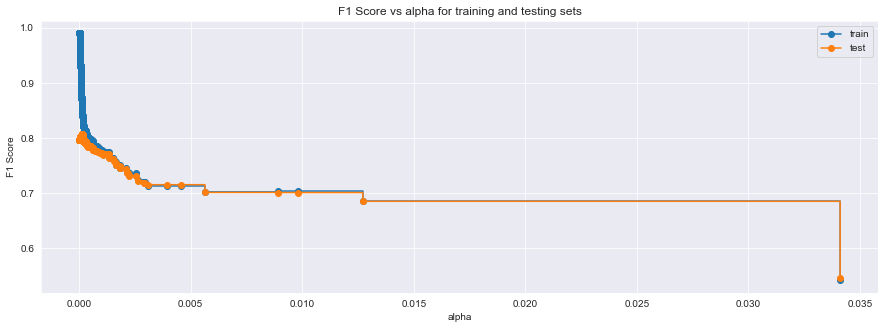

<IPython.core.display.Javascript object>

In [150]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [151]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001229122417153721, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

### Checking model performance on training set

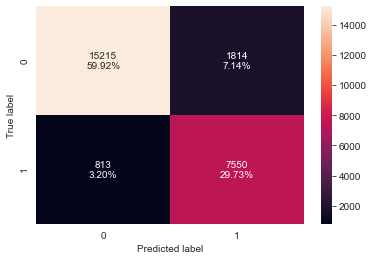

<IPython.core.display.Javascript object>

In [152]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [153]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.896542  0.902786   0.806279  0.851808

<IPython.core.display.Javascript object>

### Checking model performance on testing set

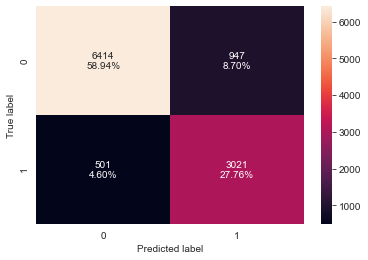

<IPython.core.display.Javascript object>

In [154]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [155]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy    Recall  Precision        F1
0  0.866948  0.857751   0.761341  0.806676

<IPython.core.display.Javascript object>

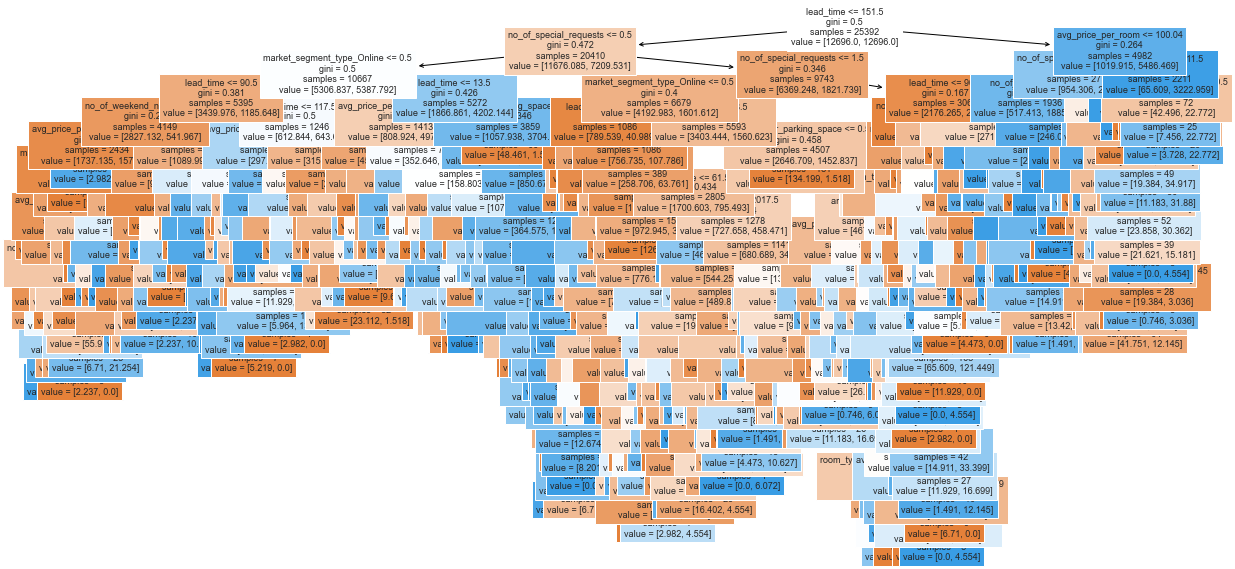

<IPython.core.display.Javascript object>

In [156]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [157]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0.0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |  

<IPython.core.display.Javascript object>

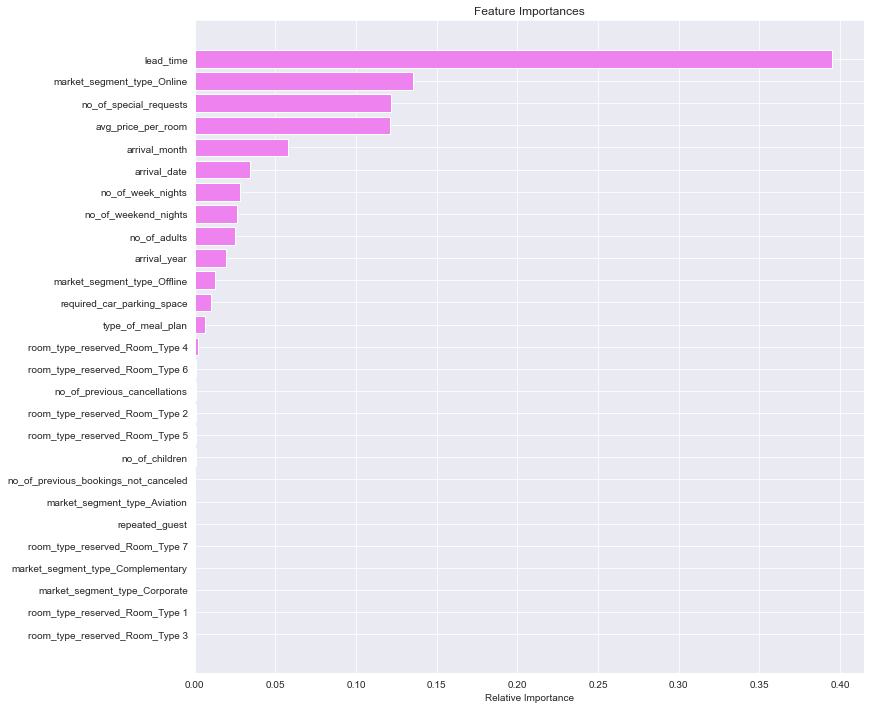

<IPython.core.display.Javascript object>

In [158]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## 8-3 Model Performance Comparison and Conclusions

In [159]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994211                     0.879923   
Recall                  0.986608                     0.856989   
Precision               0.995776                     0.794568   
F1                      0.991171                     0.824599   

           Decision Tree (Post-Pruning)  
Accuracy                       0.896542  
Recall                         0.902786  
Precision                      0.806279  
F1                             0.851808

<IPython.core.display.Javascript object>

In [160]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.872278                     0.869981   
Recall                  0.808348                     0.839012   
Precision               0.799270                     0.777018   
F1                      0.803783                     0.806826   

           Decision Tree (Post-Pruning)  
Accuracy                       0.866948  
Recall                         0.857751  
Precision                      0.761341  
F1                             0.806676

<IPython.core.display.Javascript object>

## 9- Actionable Insights and Recommendations

## Conclusion

* As it was mentioned in the logistic regression model, it tried to fit the best model on the data which it was not succeed to increase the f1-score which there were no much more parameters (only threshold available) to increase the f1 score.


* Feature selection were done on the data to make it more robust but it did not improve the model too much.

* Different methods of threshold selection was done in logistic regression model to increase the f1-score as both recall and precision value were important for us.

* Decision tree model also is checked to fit the best model on the data.

* We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.

* Decision tree model has better predicuion than logistic regression model as the f1 score in this model is increased up to 80%.

* Different methods of pruning such as pre or post pruning was done on the data to improve the model and reduce the overfitting.

* At the end the decision tree model has better predicion score on the data.

## Recommendation

* Acoording to the decision tree model: 

* The lead_time is the most important feature on the predictors. Based on the analysis, it shows that after the 5th moth of reservation the number of cancelation will be more than number of reservation. It is recommneded to make a limitation for reservation up to 5 month for the months that has more request (such as holidays) and limit the reservation time for the rest of the month to 3 month.

* The next important feature is online type reservation which need more information to be investigated for improvement. May be because the online cancelation is more easy, the amount of cancelation in this segment is more. But it needs more information.

* The next important features are no_of_special_request and avg_price_per_room which have the more effects on the cancelation. It is recommneded to work on special requst more to decrease the amount of canceation as one of the important factor on that and also making some flexible prices for the room reservation for different time of the year to be more compatative (Some seasonal offer or cycle offer for a special time).

* The arrival month is the next important feature, which has more effect on the cancelation. Therefore with some interesting packages on the low demand month and with high cancelation, the number of cancelation will be decreased.

* The next items are the no_of_week_nights and no_of_weekend_nights which may be due to high price. Playing with price during the weekends or weekdays or with special offer (like promotion codes), may be it could help to improve this item.

* The importance of the other features can be discussed in the same way. 

* There are some opportunity like the parking reseravtion as it might be one of the important feature and it is not reserved by the customers too much. It is recommended to work on such a features which for example by some offers like leasing the car for the hotel, it might help to making cash flow for the hotel.

* It is also recommended to use the feature selection for decision tree models to see what will happen and how it may help to improve the model.